## Навигация
* [1. Знакомство с данными](#1)
* [2. Предобработка данных](#2)
* [2.1 Заголовки](#3)
* [2.2 Типы данных](#4)
* [2.3 Пропуски](#5)
* [2.4 Дубликаты](#6)
* [2.5 Нулевая выручка](#7)
* [3. Исследовательский анализ данных](#8)
* [3.1 Динамика выручки](#9)
* [3.2 Выбросы](#10)
* [3.3 Сезонность](#11)
* [3.4 Группировка](#12)
* [3.5 Топ - 10 направлений ВВЛ и МВЛ](#13)
* [3.6 Матрица корреляций](#14)

1. Познакомьтесь с данными.
2. Осуществите предобработку данных.
    - 2.1 Приведите заголовки к удобному виду.
    - 2.2 Проверьте типы данных.
    - 2.3 Обработайте пропуски.
    - 2.4 Проверьте наличие дубликатов.
    - 2.5 Исключите нулевые значения в выручке для дальнейшего исследования. 
3. Исследовательский анализ данных:
     - 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.
     - 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.
     - 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.
     - 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.
     - 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
     - 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

Каждый пункт исследования сопроводите выводами.


In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

# <a class="anchor" id="1"></a>1. Для начала познакомимся с данными

In [2]:
df = pd.read_csv('air_data.csv', sep=';')
df.head()

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE


In [3]:
df.shape

(50000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ISSUE_DATE         50000 non-null  object
 1   FLIGHT_DATE_LOC    50000 non-null  object
 2   PAX_TYPE           50000 non-null  object
 3   REVENUE_AMOUNT     50000 non-null  int64 
 4   ORIG_CITY_CODE     49998 non-null  object
 5   DEST_CITY_CODE     49999 non-null  object
 6   ROUTE_FLIGHT_TYPE  50000 non-null  object
 7   FFP_FLAG           19398 non-null  object
 8   SALE_TYPE          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


<i>Заметим, что не все значения совпадают, это значит, что в данных вероятно есть пропуски. Кроме того, столбцы с датами имеют тип <code>object</code>, это не очень удобно для дальнейшей работы с ними</i>

# <a class="anchor" id="2"></a> 2. Осуществим предобработку данных

### <a class="anchor" id="3"></a> 2.1 Приведем заголовки к удобному виду

In [5]:
df.columns = df.columns.str.lower()
df.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE


### <a class="anchor" id="4"></a> 2.2 Поработаем с типами данных

In [6]:
df['issue_date'] = pd.to_datetime(df['issue_date'], format = '%Y-%m-%d %H:%M:%S')
df['flight_date_loc'] = pd.to_datetime(df['flight_date_loc'], format = '%Y-%m-%d %H:%M:%S')
df.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE


### <a class="anchor" id="5"></a> 2.3 Обработаем пропуски

In [7]:
# Для начала определим число пропущенных значений в каждом столбце датасета
df.isna().sum()

issue_date               0
flight_date_loc          0
pax_type                 0
revenue_amount           0
orig_city_code           2
dest_city_code           1
route_flight_type        0
ffp_flag             30602
sale_type                0
dtype: int64

In [8]:
# Посмотрим пропуски по столбцу 'orig_city_code'
df[df['orig_city_code'].isna()]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
2020,2022-02-17,2022-03-22,AD,440,NaN,KHV,МВЛ,NaN,ONLINE
8100,2022-05-02,2022-05-11,AD,440,NaN,KHV,МВЛ,NaN,OFFLINE


In [9]:
# Посмотрим пропуски по столбцу 'dest_city_code'
df[df['dest_city_code'].isna()]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
47582,2022-05-13,2022-07-28,AD,440,KHV,NaN,МВЛ,NaN,OFFLINE


<i>К сожалению, пропущенные данные уже не получится восстановить и они составляют всего лишь 0,006% от всего датасета, поэтому мы можем смело их удалить</i>

*Пропуски в столбце <code>'ffp_flag'</code> лучше заполнить, т.к. они означают отсутсвие программы лояльности у пассажира* 

In [10]:
df['ffp_flag'] = df['ffp_flag'].fillna('NO')

Теперь уберем оставшиеся пропуски и сделаем проверку

In [11]:
df = df.dropna()
df.shape

(49997, 9)

In [12]:
df.isna().sum()

issue_date           0
flight_date_loc      0
pax_type             0
revenue_amount       0
orig_city_code       0
dest_city_code       0
route_flight_type    0
ffp_flag             0
sale_type            0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   issue_date         49997 non-null  datetime64[ns]
 1   flight_date_loc    49997 non-null  datetime64[ns]
 2   pax_type           49997 non-null  object        
 3   revenue_amount     49997 non-null  int64         
 4   orig_city_code     49997 non-null  object        
 5   dest_city_code     49997 non-null  object        
 6   route_flight_type  49997 non-null  object        
 7   ffp_flag           49997 non-null  object        
 8   sale_type          49997 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.8+ MB


Отлично! Все пропуски обработаны, типы данных в норме, идем дальше

### <a class="anchor" id="6"></a> 2.4 Проверим наличие дубликатов

In [14]:
df.duplicated().sum()

169

In [15]:
# Посмотрим на дубликаты
df.loc[df.duplicated(keep=False)]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
337,2021-10-29,2021-11-12,AD,220,MOW,KZN,ВВЛ,FFP,ONLINE
338,2021-10-29,2021-11-12,AD,220,MOW,KZN,ВВЛ,FFP,ONLINE
649,2022-02-11,2022-08-03,AD,580,PKC,OVB,ВВЛ,NO,OFFLINE
670,2022-02-11,2022-08-03,AD,580,PKC,OVB,ВВЛ,NO,OFFLINE
716,2022-02-08,2022-08-01,AD,360,MMK,MOW,ВВЛ,NO,OFFLINE
...,...,...,...,...,...,...,...,...,...
49360,2022-03-30,2022-05-03,AD,410,MOW,OVB,ВВЛ,FFP,ONLINE
49424,2022-03-30,2022-05-03,AD,410,MOW,OVB,ВВЛ,FFP,ONLINE
49677,2022-04-02,2022-05-02,AD,470,NUX,MOW,ВВЛ,NO,ONLINE
49968,2022-06-28,2022-06-30,AD,950,MOW,HTA,ВВЛ,NO,OFFLINE


In [16]:
df = df.drop_duplicates().reset_index(drop=True)
df

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NO,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NO,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NO,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49823,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,NO,ONLINE
49824,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,NO,OFFLINE
49825,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49826,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,NO,OFFLINE


Итак, все дубликаты удалены!

### <a class="anchor" id="7"></a> 2.5 Исключим нулевые значения в выручке для дальнейшего исследования

In [17]:
df[df['revenue_amount'] == 0]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
13,2021-12-05,2022-01-16,INF,0,PEZ,MOW,ВВЛ,NO,OFFLINE
32,2021-12-08,2022-01-11,INF,0,UFA,MOW,ВВЛ,NO,ONLINE
106,2021-12-05,2022-01-08,INF,0,MOW,UFA,ВВЛ,NO,ONLINE
228,2021-12-04,2022-01-07,INF,0,MOW,AER,ВВЛ,NO,ONLINE
288,2021-10-26,2021-11-02,INF,0,MOW,PEZ,ВВЛ,NO,ONLINE
...,...,...,...,...,...,...,...,...,...
49213,2022-04-09,2022-05-01,INF,0,OVB,AER,ВВЛ,NO,ONLINE
49248,2022-04-01,2022-05-17,INF,0,MOW,KZN,ВВЛ,NO,ONLINE
49312,2021-12-16,2021-12-16,AD,0,OVB,MOW,ВВЛ,NO,OFFLINE
49519,2022-04-15,2022-05-15,INF,0,NYM,MOW,ВВЛ,NO,OFFLINE


In [18]:
df = df[df['revenue_amount'] != 0]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49362 entries, 0 to 49827
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   issue_date         49362 non-null  datetime64[ns]
 1   flight_date_loc    49362 non-null  datetime64[ns]
 2   pax_type           49362 non-null  object        
 3   revenue_amount     49362 non-null  int64         
 4   orig_city_code     49362 non-null  object        
 5   dest_city_code     49362 non-null  object        
 6   route_flight_type  49362 non-null  object        
 7   ffp_flag           49362 non-null  object        
 8   sale_type          49362 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.8+ MB


Здорово! Предобработка завершена, теперь можем переходить к исследовательскому анализу

# <a class="anchor" id="8"></a> 3. Исследовательский анализ данных

### <a class="anchor" id="9"></a> 3.1 Создадим отчет о динамике продаж (выручке). Построим линейный график. Повторим отчет с детализацией по полям: ffp_flag, route_flight_type, sale_type. Построим общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируем каждый отчет

In [20]:
# Установим единый размер для всех последующих графиков
sns.set(rc={'figure.figsize':(13, 8)}, font_scale=1.25)

[Text(0.5, 1.0, 'Динамика продаж'),
 Text(0.5, 0, 'Дата покупки'),
 Text(0, 0.5, 'Выручка')]

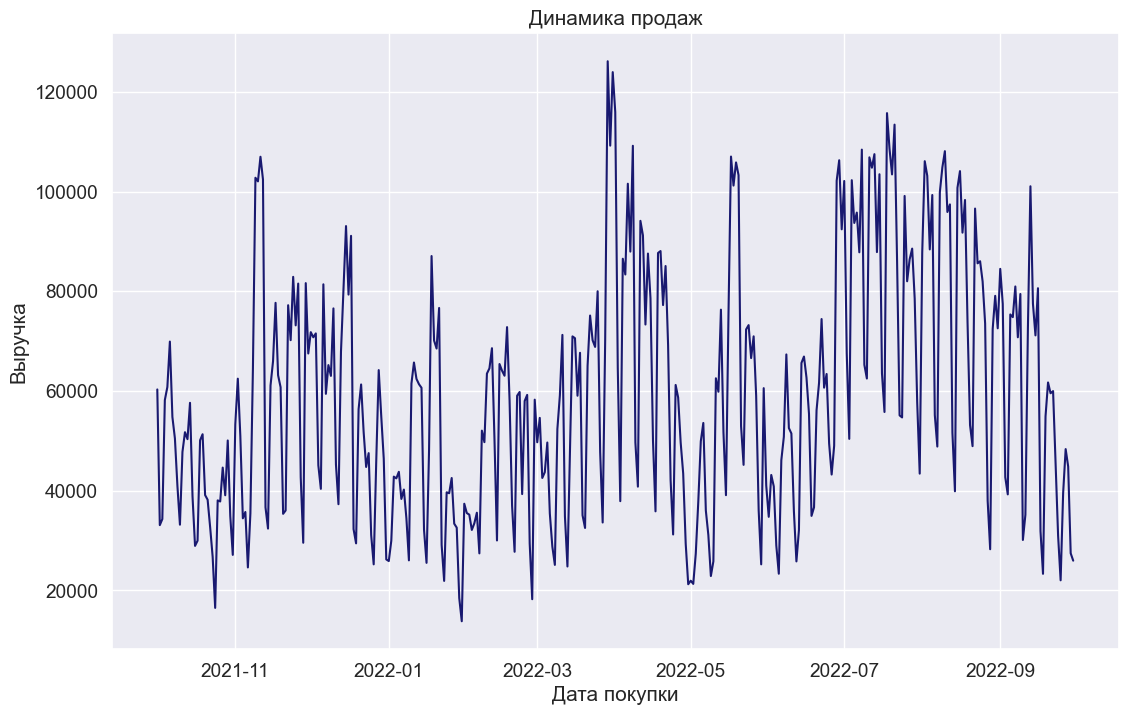

In [21]:
dynamic_revenue = df.groupby('issue_date')['revenue_amount'].sum()
sns.lineplot(data=dynamic_revenue, color='#191970').set(title='Динамика продаж', xlabel='Дата покупки', ylabel='Выручка')

На графике можно заметить, что выручка достигает наивысших значений преимущественно в летние месяцы, в основном в июле-августе. Вероятно это связано с сезоном отпусков. Также можно увидеть резкие увеличения выручки в преддверие праздников. Например, в декабре. Однако самое высокое значение выручки приходится на апрель, самое низкое же - на февраль

Повторим отчет с детализацией по полям <code>'ffp_flag'</code>, <code>'route_flight_type'</code>, <code>'sale_type'</code>

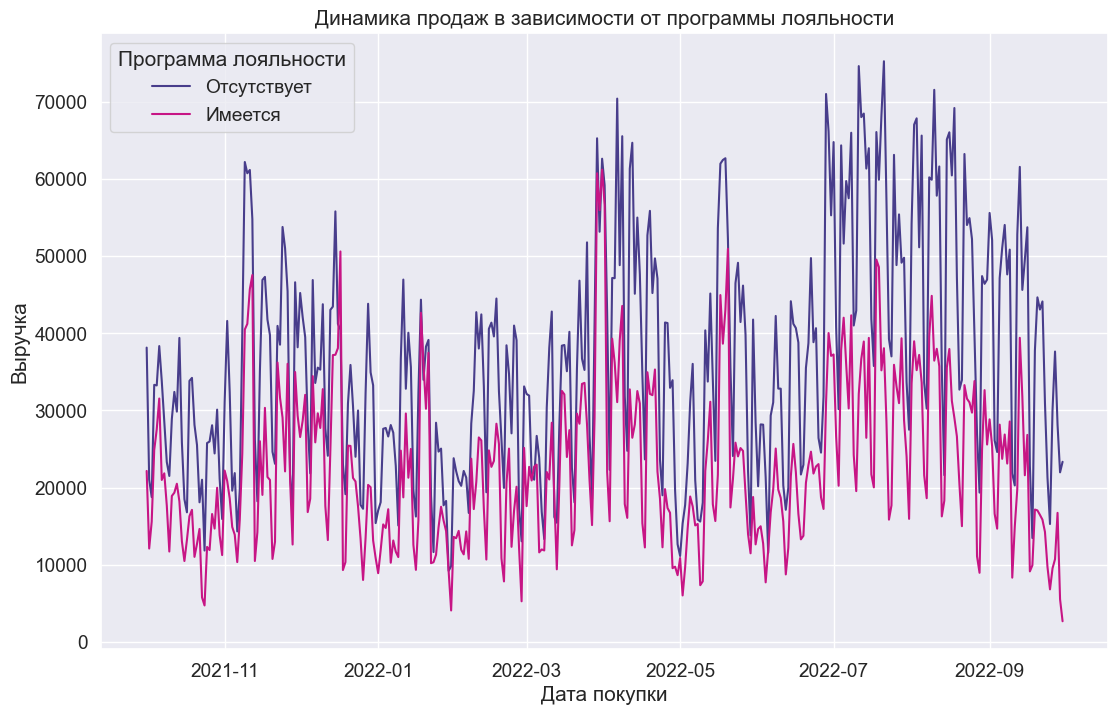

In [22]:
palette = ["#483D8B", "#C71585"]
sns.lineplot(data=df, palette=palette, hue='ffp_flag', x='issue_date', y='revenue_amount', ci=None, estimator=sum).set(title='Динамика продаж в зависимости от программы лояльности', xlabel='Дата покупки', ylabel='Выручка')
plt.legend(title='Программа лояльности', labels=['Отсутствует', 'Имеется'])

На графике видно, что динамика продаж в зависимости от наличия или отсутствия программы лояльности примерно одинаковая. Однако выручка от клиентов, пользующихся программой лояльности оказалась ниже

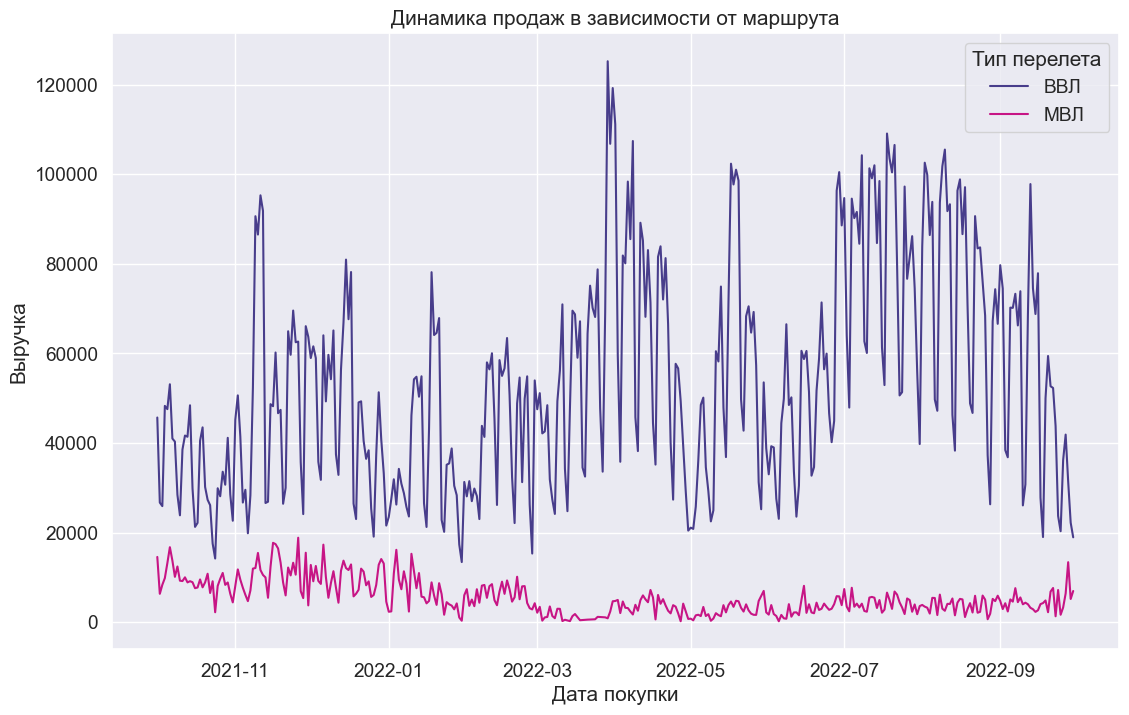

In [23]:
palette = ["#483D8B", "#C71585"]
sns.lineplot(data=df, palette=palette, hue='route_flight_type', x='issue_date', y='revenue_amount', ci=None, estimator=sum).set(title='Динамика продаж в зависимости от маршрута', xlabel='Дата покупки', ylabel='Выручка')
plt.legend(title='Тип перелета')

Выручка от продажи билетов на внутренние рейсы преобладает по сравнению с выручкой от продажи билетов на международные рейсы. Заметим, что амплитуда колебаний выручки от продажи билетов на международные рейсы значительно меньше, чем амплитуда колебаний выручки от продажи билетов на внутренние рейсы

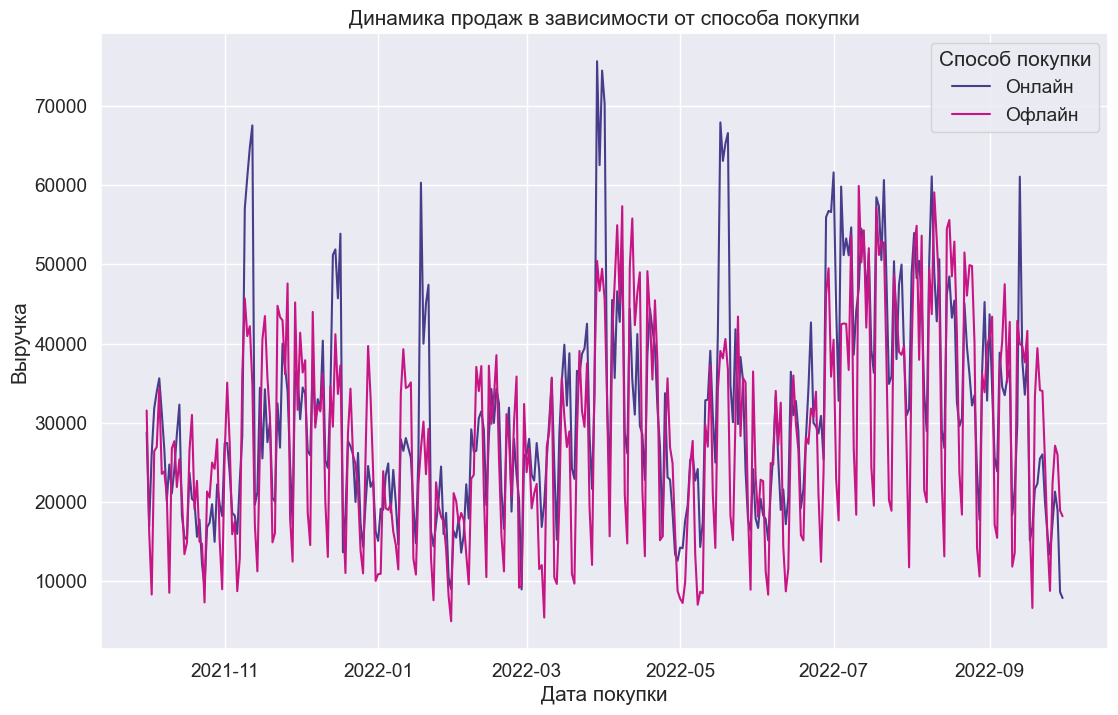

In [24]:
palette = ["#483D8B", "#C71585"]
sns.lineplot(data=df, palette=palette, hue='sale_type', x='issue_date', y='revenue_amount', ci=None, estimator=sum).set(title='Динамика продаж в зависимости от способа покупки', xlabel='Дата покупки', ylabel='Выручка')
plt.legend(title='Способ покупки', labels=['Онлайн', 'Офлайн'])

Заметим, что в динамике онйлан продаж присуствуют резкие скачки. Также в летние месяцы наблюдаются стабильно высокие продажи

Построим общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки и по программам лояльности

In [25]:
sns.set(rc={'figure.figsize':(16, 10)}, font_scale=1)

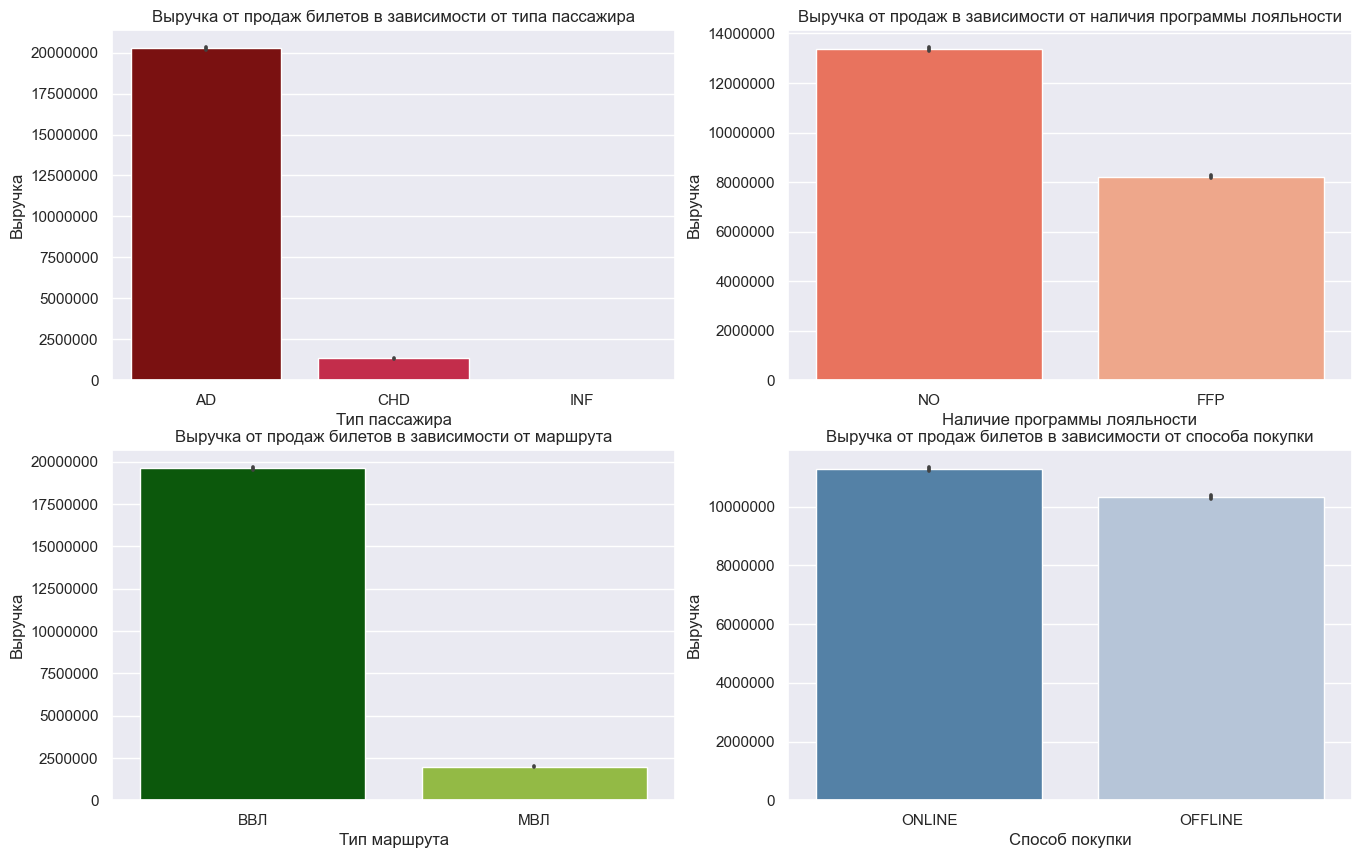

In [26]:
fig, axes = plt.subplots(2, 2)
sns.barplot(data=df, x='pax_type', y='revenue_amount', estimator=np.sum, ax=axes[0,0], palette=['#8B0000', '#DC143C', '#FA8072']).set(title='Выручка от продаж билетов в зависимости от типа пассажира', xlabel='Тип пассажира', ylabel='Выручка')
sns.barplot(data=df, x='ffp_flag', y='revenue_amount', estimator=np.sum, ax=axes[0,1], palette=['#FF6347', '#FFA07A']).set(title='Выручка от продаж в зависимости от наличия программы лояльности', xlabel='Наличие программы лояльности', ylabel='Выручка')
sns.barplot(data=df, x='route_flight_type', y='revenue_amount', estimator=np.sum, ax=axes[1,0], palette=['#006400', '#9ACD32']).set(title='Выручка от продаж билетов в зависимости от маршрута', xlabel='Тип маршрута', ylabel='Выручка')
sns.barplot(data=df, x='sale_type', y='revenue_amount', estimator=np.sum, ax=axes[1,1], palette=['#4682B4', '#B0C4DE']).set(title='Выручка от продаж билетов в зависимости от способа покупки', xlabel='Способ покупки', ylabel='Выручка')
for ax in axes.flat:
    ax.ticklabel_format(style='plain', axis='y')

1. Мы видим, что больше всего выручки от продажи билетов для взрослых пассажиров; <br> 
2. Выручка от продажи в зависимости от программы лояльности больше при отсутствии такой программы у клиента; <br> 
3. Что касается типа маршрута, то больше всего выручки приходит от продажи билетов на внутренние рейсы, причем она значительно превосходит выручку от продаж билетов на международные рейсы; <br>
4. Выручка от онлайн продаж немного больше, чем от офлайн продажи билетов

### <a class="anchor" id="10"></a> 3.2 Исследуем выручку на наличие выбросов

In [27]:
sns.set(rc={'figure.figsize':(10, 5)}, font_scale=1.25)

<AxesSubplot:xlabel='revenue_amount', ylabel='Density'>

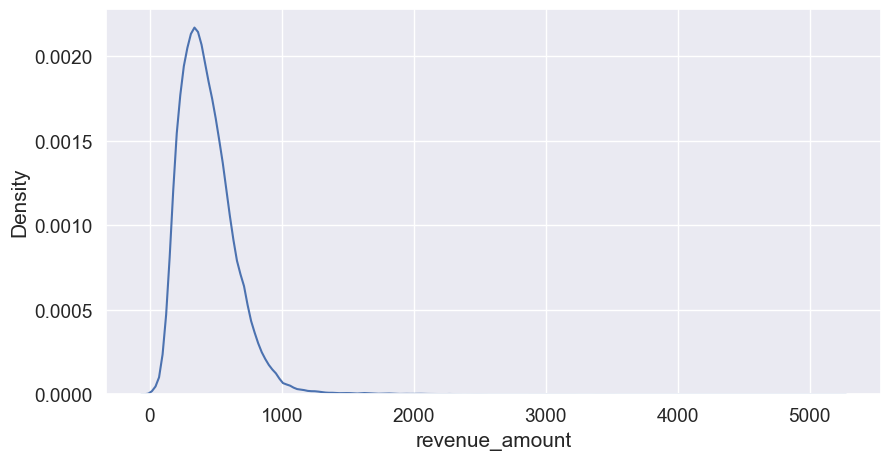

In [28]:
sns.kdeplot(data=df['revenue_amount'])

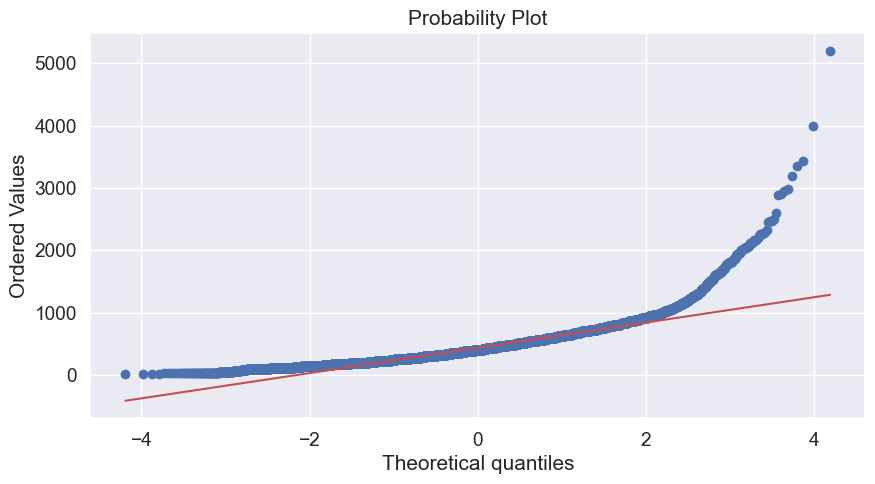

In [29]:
st.probplot(df['revenue_amount'], dist='norm', plot=plt)
plt.show()

На графике видно, что присутствует ярковыраженная правосторонняя асимметрия

Посмторим на наличие выбросов. Для этого построим "ящик с усами"

<AxesSubplot:>

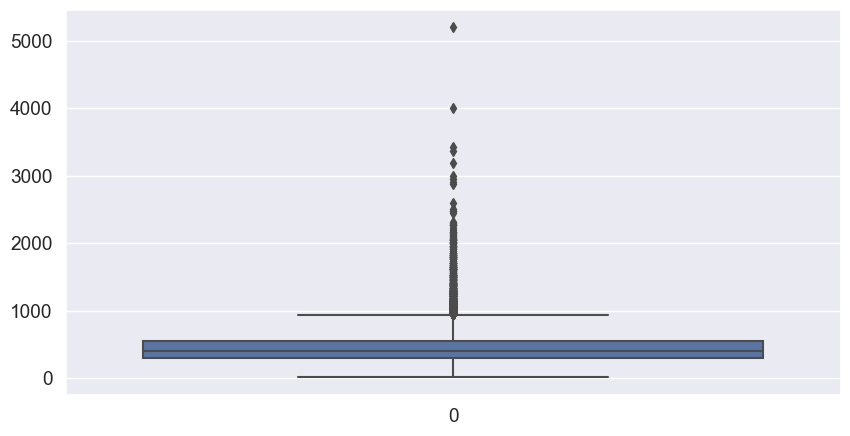

In [30]:
sns.boxplot(data=df['revenue_amount'])

На графике видно, что в датасете присутствуют выбросы в диапазоне значений 3500-4000 и несколько 'экстремальных выбросов' за пределами 5000

In [31]:
q75 = np.percentile(df['revenue_amount'], 75)
q25 = np.percentile(df['revenue_amount'], 25)

# Находим межквартильный размах
iqr = q75 - q25

# Определим границы выбросов
ejection_h = q75 + iqr * 1.5
ejection_l = q25 - iqr * 1.5

In [32]:
print(f'{ejection_h}, {ejection_l}')

940.0, -100.0


Отрицательные значения нас не интересуют, поэтому посмотрим на количество выбросов превышающих верхнюю границу

In [33]:
n_ejection = df['revenue_amount'][(df['revenue_amount'] > ejection_h)].count()
print('Число выбросов:', n_ejection)

Число выбросов: 987


Выбросы составляют примерно 2% от всего датасета. Однако не будет удалять их из данных, лучше перезапишем наш датасет без выбросов

In [34]:
good_df = df[(df['revenue_amount'] <= ejection_h)]
good_df = good_df.reset_index(drop=True)
good_df

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NO,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NO,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NO,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
48370,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,NO,ONLINE
48371,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,NO,OFFLINE
48372,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
48373,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,NO,OFFLINE


Сделаем проверку

In [35]:
len(df) - len(good_df)

987

Теперь снова посмотрим на Q-Q график и функцию плотности распределения

<AxesSubplot:xlabel='revenue_amount', ylabel='Density'>

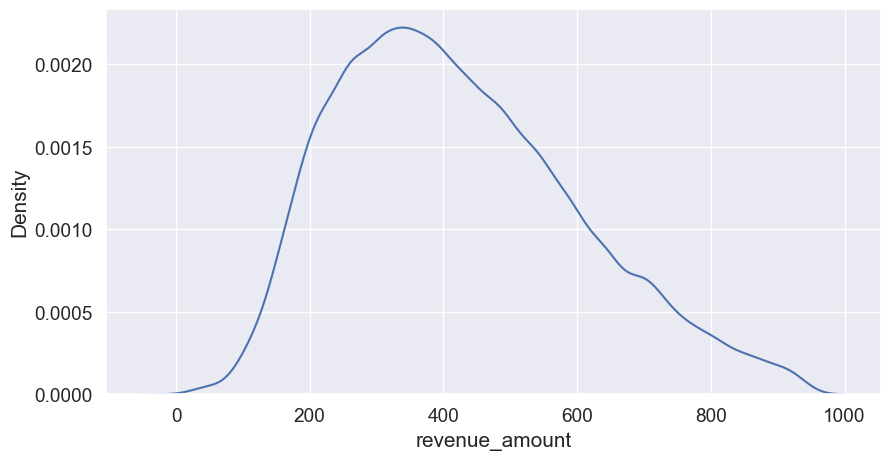

In [36]:
sns.kdeplot(data=good_df['revenue_amount'])

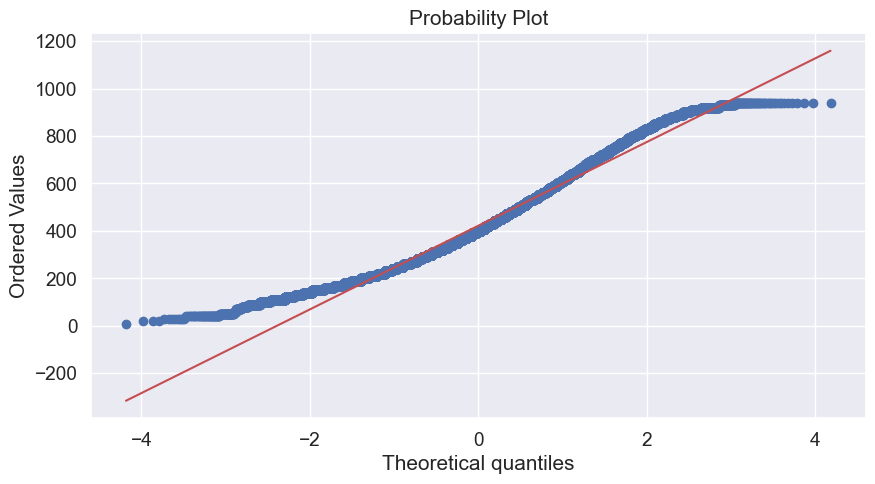

In [37]:
st.probplot(good_df['revenue_amount'], dist='norm', plot=plt)
plt.show()

Асимметрия пропала. Распределение стало более приближенным к нормальному 

Переходим к следующему пункту! 

### <a class="anchor" id="11"></a> 3.3 Исследуем сезонность продаж. Дополнительно проверим гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуем выручку и число продаж по месяцам, проверим корреляцию

Создадим сводную таблицу со значениями выручки за каждый день покупок

In [38]:
daily_revenue = good_df.pivot_table(index='issue_date', values='revenue_amount', aggfunc='sum').reset_index()
daily_revenue['issue_month'] = daily_revenue['issue_date'].dt.month
daily_revenue.head()

,issue_date,revenue_amount,issue_month
0,2021-10-01,56730,10
1,2021-10-02,32100,10
2,2021-10-03,34320,10
3,2021-10-04,57050,10
4,2021-10-05,56720,10


Рассмотрим среднюю выручку и среднее число продаж за каждый месяц

In [39]:
sns.set(rc={'figure.figsize':(13, 8)}, font_scale=1.25)

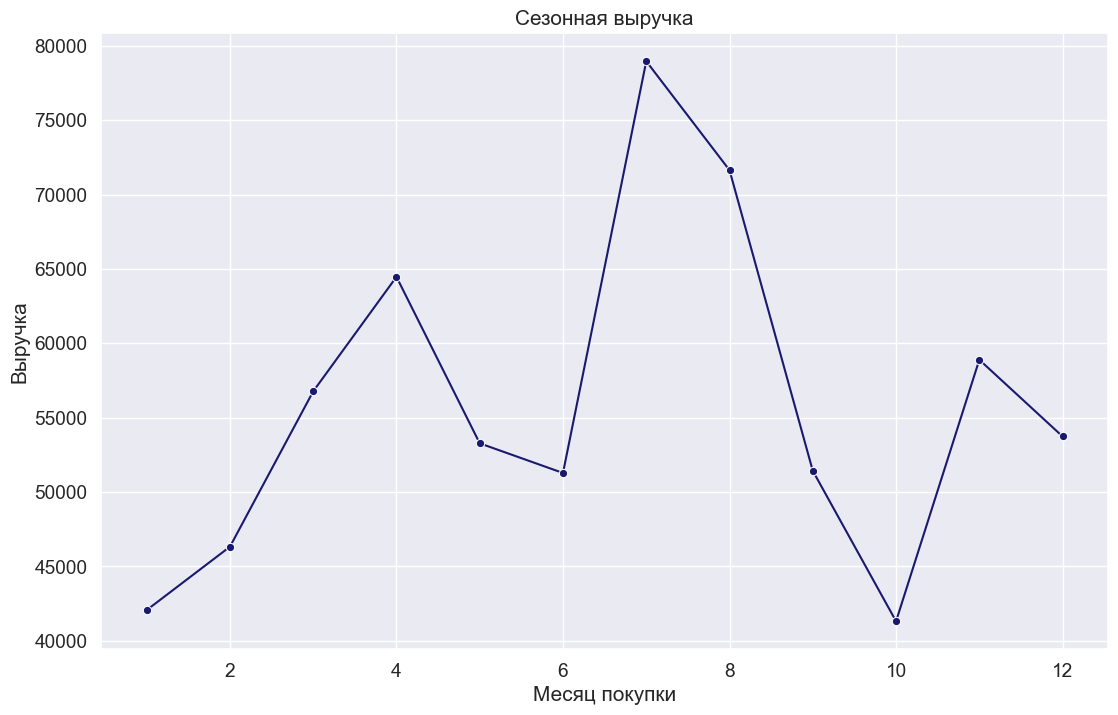

In [40]:
# Выручка
dynamic_revenue_month = daily_revenue.groupby('issue_month')['revenue_amount'].mean()
sns.lineplot(data=dynamic_revenue_month, color='#191970', marker='o').set(title='Сезонная выручка', xlabel='Месяц покупки', ylabel='Выручка')
plt.ticklabel_format(style='plain', axis='y')

In [41]:
# Число продаж
sales_number_month = good_df.pivot_table(index=good_df['issue_date'].dt.month, values='revenue_amount', aggfunc=lambda x: x.count() / 30)
sales_number_month

,revenue_amount
issue_date,
1,118.400000
2,113.800000
3,142.500000
4,129.566667
5,118.766667
6,109.566667
7,169.766667
8,152.366667
9,118.500000


[Text(0.5, 1.0, 'Сезонные продажи'),
 Text(0.5, 0, 'Месяц покупки'),
 Text(0, 0.5, 'Количество продаж')]

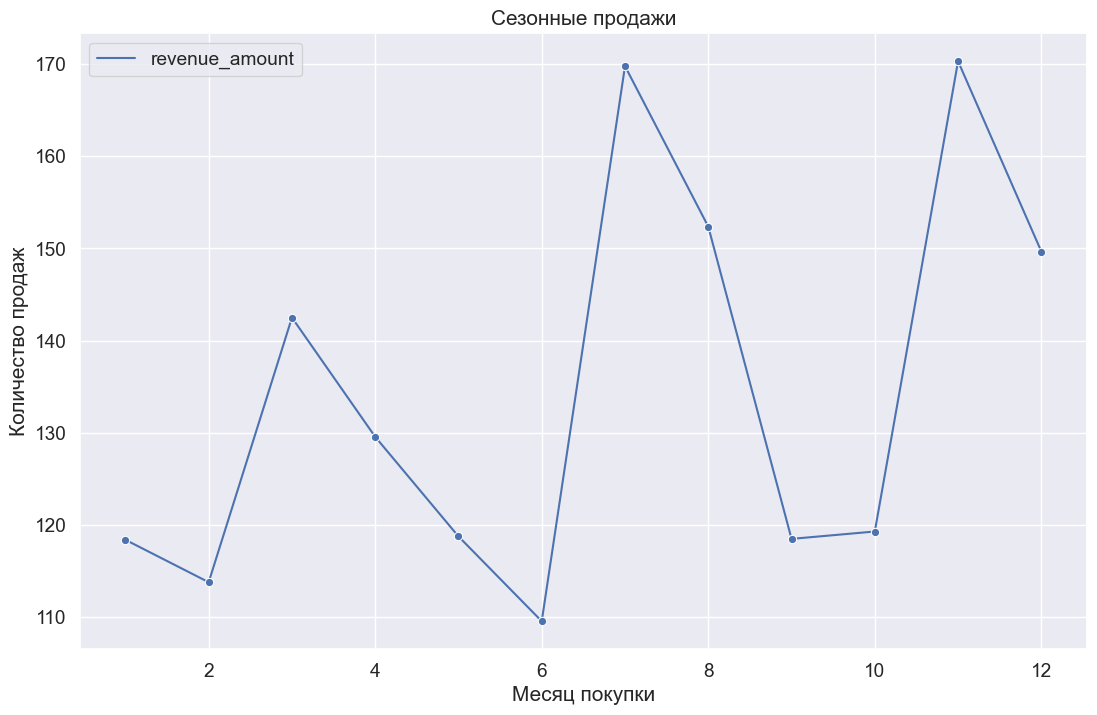

In [42]:
# Число продаж
sns.lineplot(data=sales_number_month, color='#191970', marker='o').set(title='Сезонные продажи', xlabel='Месяц покупки', ylabel='Количество продаж')

Таким образом, наивысшая выручка от продаж приходится на июль, так же как и самое большое число продаж

Отфильтруем данные для зимних и осенних продаж

In [43]:
autumn = daily_revenue.query('issue_month >= 9 and issue_month <= 11')['revenue_amount']
winter = daily_revenue.query('issue_month == 12 or issue_month <= 2')['revenue_amount']

Для начала проверим наши выборки на нормальность распределения

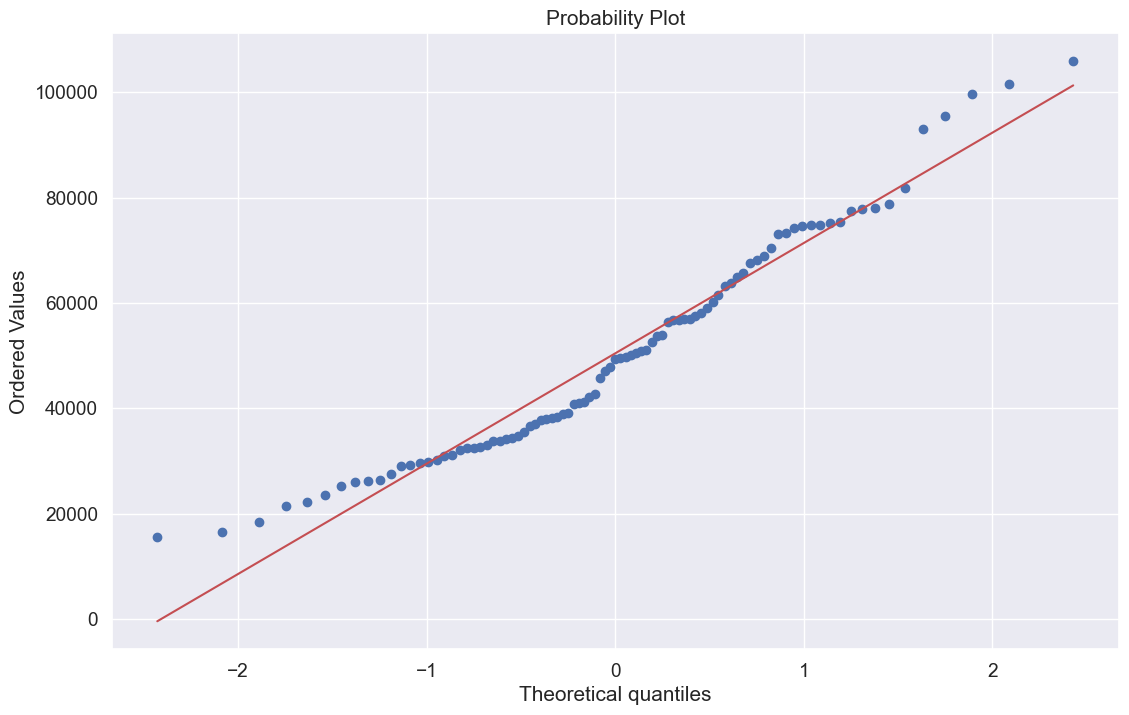

In [44]:
# Q-Q plot для осенних продаж
st.probplot(autumn, dist='norm', plot=plt)
plt.show()

Судя по графику, распределение выручки от осенних продаж явно ненормальное

Для того, чтобы удостовериться в этом проведем тест Шапиро-Уилка

Нулевая гипотеза (H0) предполагает, что распределение нормально <br>
Альтернативная гипотеза (H1) утверждает обратное

In [45]:
stat, p = st.shapiro(autumn)

alpha = 0.05
if p < alpha:
    print(f'р - значение: {p}\nОтвергаем нулевую гипотезу. Выборка не имеет нормального распределения')
else:
    print(f'р - значение: {p}\nНе получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

р - значение: 0.003581226570531726
Отвергаем нулевую гипотезу. Выборка не имеет нормального распределения


То же самое проделаем с выручкой от продаж зимой

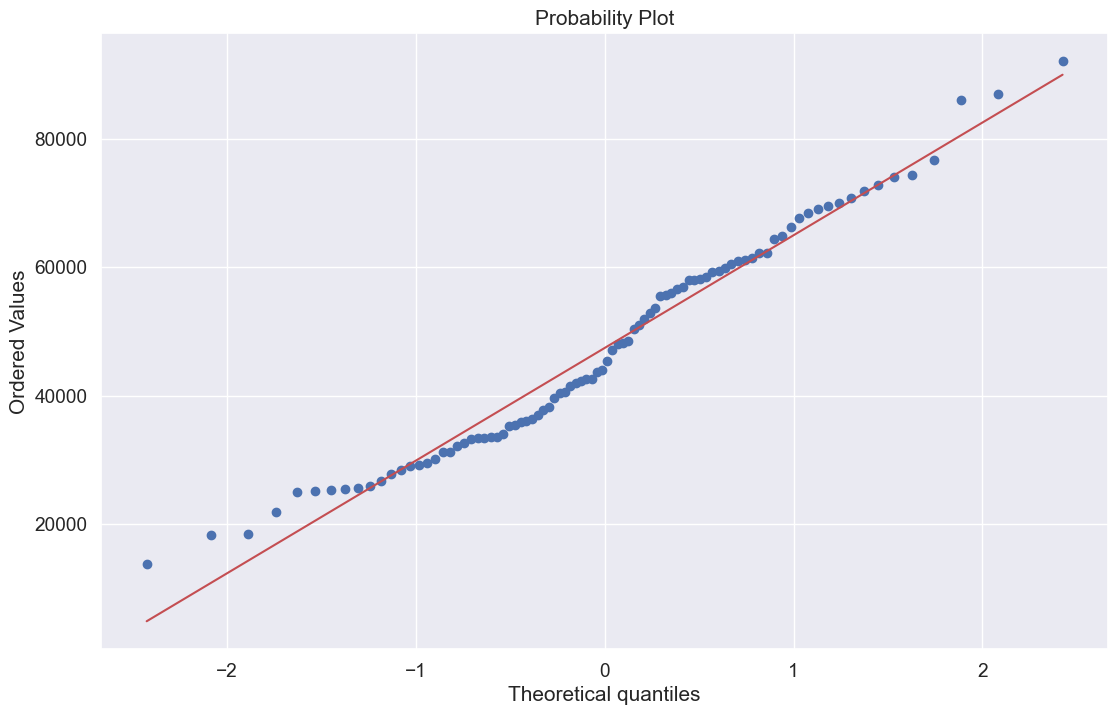

In [46]:
# Q-Q plot для зимних продаж
st.probplot(winter, dist='norm', plot=plt)
plt.show()

In [47]:
stat, p = st.shapiro(winter)

alpha = 0.05
if p < alpha:
    print(f'р - значение: {p}\nОтвергаем нулевую гипотезу. Выборка не имеет нормального распределения')
else:
    print(f'р - значение: {p}\nНе получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

р - значение: 0.042753804475069046
Отвергаем нулевую гипотезу. Выборка не имеет нормального распределения


Таким образом, мы выявили, что обе наши выборки не имеют нормального распределения <br>
Тогда для проверки гипотезы необходимо использовать тест Манна-Уитни

Проверим гипотезу о том, что средняя выручка от продаж осенью и зимой совпадает (Н0). Для начала сформулируем альтернативную гипотезу: средняя выручка от продаж осенью и зимой различна (Н1)

In [48]:
from scipy.stats import mannwhitneyu

In [49]:
alpha = 0.05 # уровень статистической значимости
         
# проводим тест Манна-Уитни
u_stat, p_value = mannwhitneyu(autumn, winter, alternative='two-sided')

print('p-значение:', p_value)

if p_value < alpha:
    print(f'Полученное p-значение ({round(p_value, 3)}) меньше уровня значимости ({alpha}). Это значит, что у нас есть основания отвергнуть нулевую гипотезу в пользу альтернативной. Таким образом, мы можем утверждать, что средняя выручка от продаж осенью и зимой различна') 
else:
    print(f'Полученное p-значение ({round(p_value, 3)}) больше уровня значимости ({alpha}). Это значит, что у нас нет оснований отвергать нулевую гипотезу в пользу альтернативной. Таким образом, мы можем утверждать, что средняя выручка от продаж осенью и зимой совпадает') 

p-значение: 0.45125903442168036
Полученное p-значение (0.451) больше уровня значимости (0.05). Это значит, что у нас нет оснований отвергать нулевую гипотезу в пользу альтернативной. Таким образом, мы можем утверждать, что средняя выручка от продаж осенью и зимой совпадает


Теперь построим корреляционную матрицу для определения зависимости между сезоном, выручкой, и числом продаж 

Для удобства создадим отдельный датасет на основе которого будет впоследствии построена матрица корреляций

In [50]:
corr_df = pd.merge(dynamic_revenue_month, sales_number_month.reset_index(), left_on = 'issue_month', right_on = 'issue_date', how='left')
corr_df.rename(columns = {'revenue_amount_x':'daily_revenue', 'revenue_amount_y':'purchase_num'}, inplace=True)
corr_df

,daily_revenue,issue_date,purchase_num
0,42067.419355,1,118.400000
1,46328.214286,2,113.800000
2,56772.903226,3,142.500000
3,64473.333333,4,129.566667
4,53280.000000,5,118.766667
5,51286.666667,6,109.566667
6,78966.451613,7,169.766667
7,71642.580645,8,152.366667
8,51432.666667,9,118.500000
9,41318.387097,10,119.300000


На всякий случай проверим распределение выручки от продаж на нормальность

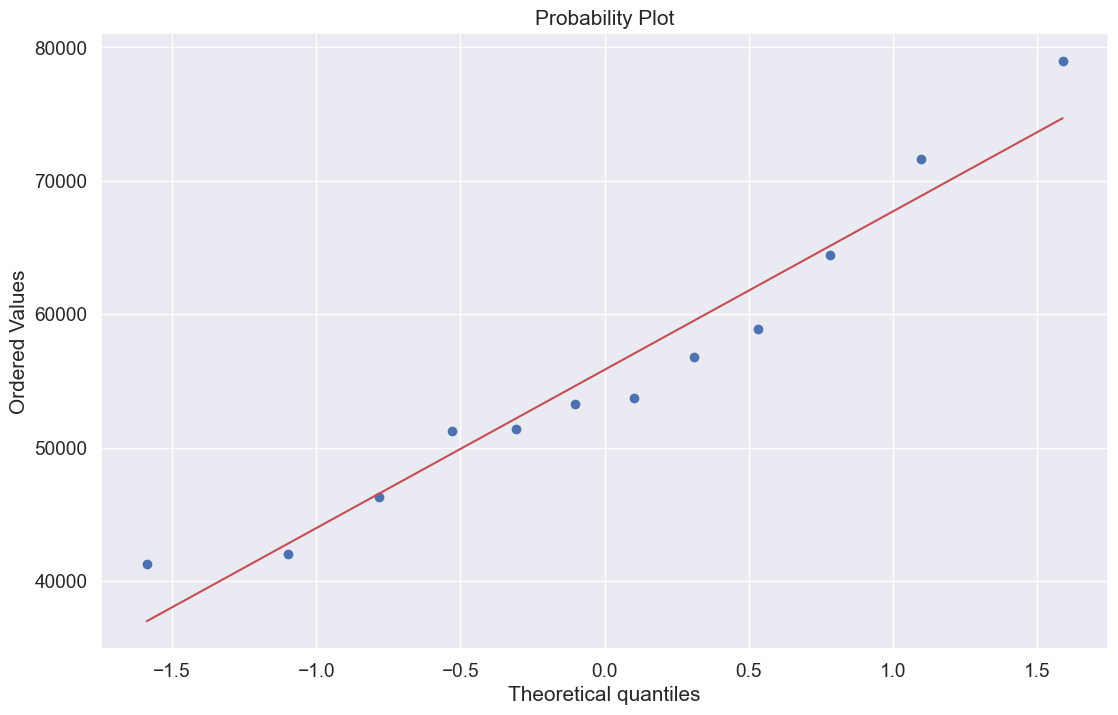

In [51]:
st.probplot(corr_df['daily_revenue'], dist='norm', plot=plt)
plt.show()

In [52]:
stat, p = st.shapiro(corr_df['daily_revenue'])

alpha = 0.05
if p < alpha:
    print(f'р - значение: {p}\nОтвергаем нулевую гипотезу. Выборка не имеет нормального распределения')
else:
    print(f'р - значение: {p}\nНе получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

р - значение: 0.49373936653137207
Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение


Отлично, значит мы можем использовать коэффициент корреляции Пирсона

In [53]:
corr_df.corr()

,daily_revenue,issue_date,purchase_num
daily_revenue,1.000000,0.167979,0.739295
issue_date,0.167979,1.000000,0.461072
purchase_num,0.739295,0.461072,1.000000


Таким образом, мы видим, что зависимость между месяцем обращения и выручкой прямая и слабая, в то время как связь между месяцем обращения и числом покупок прямая и высокая

Итак, можно сделать вывод, что в течение года и выручка, и число продаж увеличились

### <a class="anchor" id="12"></a> 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверим гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разобьем клиентов минимум на три группы

В первую очередь разобьем наших клиентов на 4 группы, в зависимости от времени покупки билетов

In [54]:
good_df['sale_difference'] = (good_df['flight_date_loc'] - good_df['issue_date']) / np.timedelta64(1 , 'D')
good_df.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,sale_difference
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NO,ONLINE,35.0
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NO,OFFLINE,3.0
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,37.0
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NO,ONLINE,28.0
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,35.0


In [55]:
good_df['sale_difference'].describe()

count    48375.000000
mean        21.050274
std         30.939475
min          0.000000
25%          3.000000
50%          9.000000
75%         25.000000
max        317.000000
Name: sale_difference, dtype: float64

In [56]:
good_df['sale_grouped'] = pd.cut(good_df['sale_difference'],
                          bins=[float('-inf'), 3, 9, 25, 317], # разбили на группы в соответствие со значениями квантилей распределения
                          labels=['Очень рано', 'Заранее', 'Поздновато', 'В последний момент'])
good_df.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,sale_difference,sale_grouped
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NO,ONLINE,35.0,В последний момент
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NO,OFFLINE,3.0,Очень рано
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,37.0,В последний момент
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NO,ONLINE,28.0,В последний момент
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,35.0,В последний момент


In [57]:
good_df['sale_grouped'].value_counts()

Поздновато            12362
Заранее               12140
Очень рано            12116
В последний момент    11757
Name: sale_grouped, dtype: int64

Перед проверкой гипотезы, убедимся в том, что наши выборки имеют нормальное распределение

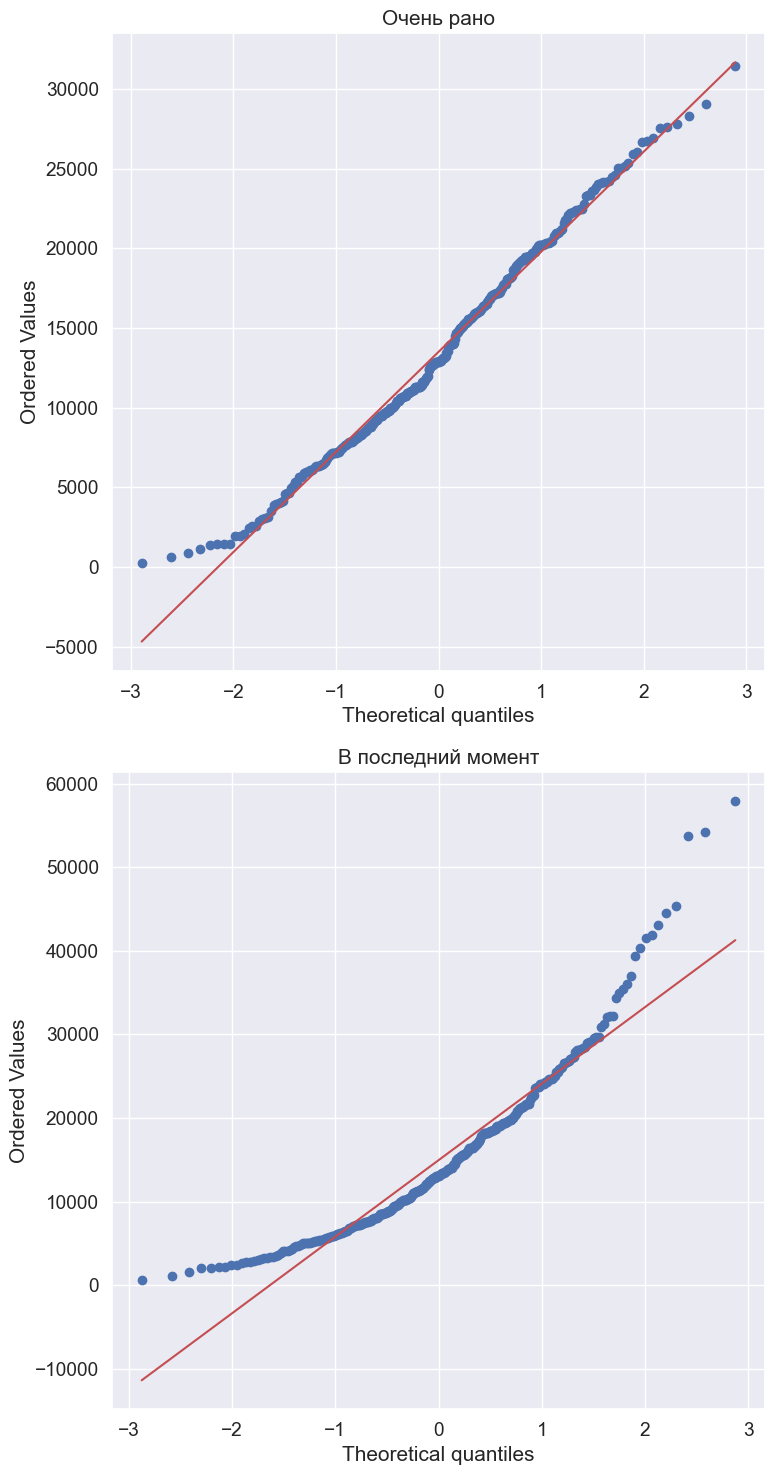

In [105]:
fig, axes = plt.subplots(2, 1, figsize = (8, 15))

for i, group in enumerate(['Очень рано', 'В последний момент']):
    ax = axes[i]
    category = good_df.query('sale_grouped == @group')
    table = category.pivot_table(index='issue_date', values='revenue_amount', aggfunc=sum)
    st.probplot(table['revenue_amount'], dist='norm', plot=ax)
    ax.set_title(group)
plt.tight_layout()
plt.show()

На графиках видно, что распределение данных в наших выборках явно ненормальное. Однако для того, чтобы убедиться в этом наверняка проведем тест Шапиро-Уилка

Нулевая гипотеза (H0) предполагает, что распределение нормально <br>
Альтернативная гипотеза (H1) утверждает обратное

In [120]:
for element, group in enumerate(['Очень рано', 'В последний момент']):
    category = good_df.query('sale_grouped == @group')
    table = category.pivot_table(index='issue_date', values='revenue_amount', aggfunc=sum)
    stat, p = st.shapiro(table['revenue_amount'])
    alpha = 0.05
    if p < alpha:
        print(f'Группа "{group}"\nр - значение: {p}\nОтвергаем нулевую гипотезу. Выборка не имеет нормального распределения\n')
    else:
        print(f'Группа "{group}"\nр - значение: {p}\nНе получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение\n')


Группа "Очень рано"
р - значение: 0.006359247025102377
Отвергаем нулевую гипотезу. Выборка не имеет нормального распределения

Группа "В последний момент"
р - значение: 2.9241718638509107e-13
Отвергаем нулевую гипотезу. Выборка не имеет нормального распределения



Действительно, наши данные распределены НЕ нормально. В таком случае, мы не можем использовать тест Стьюдента для проверки гипотезы, поставленной в начале задания

Воспользуемся тестом Манна-Уитни из библиотеки <code>scipy.stats</code>

Проверим гипотезу о том, что средняя выручка от продажи билетов для тех, кто покупает их очень рано и тех, кто покупает билет в самый последний момент, совпадает (Н0). <br>
Сформулируем альтернативную гипотезу: средняя выручка от продажи билетов для этих двух групп отличается (Н1) 

In [60]:
alpha = 0.05 # уровень статистической значимости
         
# проводим тест Манна-Уитни

u_stat, p_value = mannwhitneyu(good_df.query('sale_grouped == "Очень рано"')['revenue_amount'], good_df.query('sale_grouped == "В последний момент"')['revenue_amount'], alternative='two-sided')

if p_value < alpha:
    print(f'Полученное p-значение ({p_value}) меньше уровня значимости ({alpha}). Это значит, что у нас есть основания отвергнуть нулевую гипотезу в пользу альтернативной. Таким образом, мы можем утверждать, что средняя выручка от продажи билетов для тех, кто покупает их очень рано и тех, кто покупает билеты в самый последний момент, отличается')
else:
    print(f'Полученное p-значение ({p_value}) больше уровня значимости ({alpha}). Это значит, что у нас нет оснований отвергать нулевую гипотезу в пользу альтернативной. Таким образом, мы можем утверждать, что средняя выручка от продажи билетов для тех, кто покупает их очень рано и тех, кто покупает билеты в самый последний момент, совпадает')

Полученное p-значение (5.289571692868709e-53) меньше уровня значимости (0.05). Это значит, что у нас есть основания отвергнуть нулевую гипотезу в пользу альтернативной. Таким образом, мы можем утверждать, что средняя выручка от продажи билетов для тех, кто покупает их очень рано и тех, кто покупает билеты в самый последний момент, отличается


### <a class="anchor" id="13"></a> 3.5 Определим топ-10 популярных направлений перелета (город-город) отдельно для ВВЛ и МВЛ. Изучим выручку для этих направлений. Добавим в датасет сведения о городах, используя данные из датасета: https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat

In [61]:
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'

In [62]:
column_names = ['Airport Name', 'Location', 'Country', 'IATA_Code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']

Загрузим новый датасет с заголовками из списка

In [63]:
new_df = pd.read_csv(url, sep=',', header=None, names=column_names)
new_df.columns = new_df.columns.str.lower()
new_df

,airport name,location,country,iata_code,icao_code,latitude,longitude,altitude,timezone,dst,timezone region,type,source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


Посмотрим информацию по новому датасету

In [64]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7698 entries, 1 to 14110
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airport name     7698 non-null   object 
 1   location         7649 non-null   object 
 2   country          7698 non-null   object 
 3   iata_code        7698 non-null   object 
 4   icao_code        7698 non-null   object 
 5   latitude         7698 non-null   float64
 6   longitude        7698 non-null   float64
 7   altitude         7698 non-null   int64  
 8   timezone         7698 non-null   object 
 9   dst              7698 non-null   object 
 10  timezone region  7698 non-null   object 
 11  type             7698 non-null   object 
 12  source           7698 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 842.0+ KB


Типы данных в норме. Но мы видим, что в столбце <code>'location'</code> вероятно есть пропуски. Однако лучше поработать с ними после объединения датасетов

Проверим наш новый датасет на наличие дубликатов

In [65]:
df.duplicated().sum()

0

Дубликаты не обнаружены, можно двигаться дальше! 

Далее объединим два наших датасета

In [66]:
# Сперва выполним объединение по городу отправления
merged_df = pd.merge(good_df, new_df, left_on='orig_city_code', right_on='iata_code', how='left')

# Затем объединим полученный датасет с новым по городу назначенияя
merged_df1 = pd.merge(merged_df, new_df, left_on='dest_city_code', right_on='iata_code', how='left')
merged_df1.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,sale_difference,...,iata_code_y,icao_code_y,latitude_y,longitude_y,altitude_y,timezone_y,dst_y,timezone region_y,type_y,source_y
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NO,ONLINE,35.0,...,KGD,UMKK,54.889999,20.592600,42.0,2,N,Europe/Kaliningrad,airport,OurAirports
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NO,OFFLINE,3.0,...,OVB,UNNT,55.012600,82.650703,365.0,7,N,Asia/Krasnoyarsk,airport,OurAirports
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NO,ONLINE,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,35.0,...,KRR,URKK,45.034698,39.170502,118.0,3,N,Europe/Moscow,airport,OurAirports


In [67]:
# Переименуем некоторые столбцы 
merged_df1.rename(columns = {'location_x':'orig_city', 'location_y':'dest_city', 'country_x':'orig_country', 'country_y':'dest_country', 'airport name_x':'orig_airport_name', 'airport name_y':'dest_airport_name'}, inplace = True)

Столбцов очень много, ничего не видно🤯 Удалим те, которые не понадобятся нам для дальнейшего анализа

In [68]:
merged_df1.drop(['latitude_y', 'longitude_y', 'altitude_y', 'timezone_y', 'dst_y', 'latitude_x', 'longitude_x', 'altitude_x', 'timezone_x', 'dst_x', 'iata_code_y', 'icao_code_y', 'iata_code_x', 'icao_code_x', 'type_x', 'type_y', 'source_x', 'source_y', 'timezone region_x', 'timezone region_y', 'orig_country', 'dest_country'], axis=1, inplace=True )
merged_df1.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,sale_difference,sale_grouped,orig_airport_name,orig_city,dest_airport_name,dest_city
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NO,ONLINE,35.0,В последний момент,NaN,NaN,Khrabrovo Airport,Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NO,OFFLINE,3.0,Очень рано,Yuzhno-Sakhalinsk Airport,Yuzhno-sakhalinsk,Tolmachevo Airport,Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,37.0,В последний момент,Khrabrovo Airport,Kaliningrad,NaN,NaN
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NO,ONLINE,28.0,В последний момент,Voronezh International Airport,Voronezh,NaN,NaN
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,35.0,В последний момент,NaN,NaN,Krasnodar Pashkovsky International Airport,Krasnodar


Теперь обработаем пропуски

In [69]:
merged_df1.isna().sum()

issue_date               0
flight_date_loc          0
pax_type                 0
revenue_amount           0
orig_city_code           0
dest_city_code           0
route_flight_type        0
ffp_flag                 0
sale_type                0
sale_difference          0
sale_grouped             0
orig_airport_name    15933
orig_city            15933
dest_airport_name    16037
dest_city            16037
dtype: int64

In [70]:
merged_df1[merged_df1['orig_city'].isna()]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,sale_difference,sale_grouped,orig_airport_name,orig_city,dest_airport_name,dest_city
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NO,ONLINE,35.0,В последний момент,NaN,NaN,Khrabrovo Airport,Kaliningrad
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,35.0,В последний момент,NaN,NaN,Krasnodar Pashkovsky International Airport,Krasnodar
5,2021-11-29,2022-01-14,AD,250,MOW,DUS,МВЛ,NO,ONLINE,46.0,В последний момент,NaN,NaN,Düsseldorf Airport,Duesseldorf
6,2021-12-03,2022-01-06,AD,200,MOW,PEE,ВВЛ,FFP,ONLINE,34.0,В последний момент,NaN,NaN,Bolshoye Savino Airport,Perm
7,2021-11-28,2022-01-07,CHD,70,MOW,AER,ВВЛ,FFP,ONLINE,40.0,В последний момент,NaN,NaN,Sochi International Airport,Sochi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48356,2022-06-27,2022-06-29,AD,290,MOW,KUF,ВВЛ,NO,OFFLINE,2.0,Очень рано,NaN,NaN,Kurumoch International Airport,Samara
48366,2022-06-15,2022-06-16,AD,260,MOW,UFA,ВВЛ,NO,OFFLINE,1.0,Очень рано,NaN,NaN,Ufa International Airport,Ufa
48367,2022-06-22,2022-06-28,AD,810,MOW,BTK,ВВЛ,NO,OFFLINE,6.0,Заранее,NaN,NaN,Bratsk Airport,Bratsk
48370,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,NO,ONLINE,11.0,Поздновато,NaN,NaN,Omsk Central Airport,Omsk


Итак, мы видим, что у нас не заполнены данные для Москвы. Все три московских аэропорта в нашем датасете представлены под кодом <code>'MOW'</code>. Заполним их вручную

In [71]:
merged_df1.loc[merged_df1['orig_city_code'] == 'MOW', 'orig_city'] = 'Moscow'

Теперь посмотрим остались ли еще пропуски

In [72]:
merged_df1.isna().sum()

issue_date               0
flight_date_loc          0
pax_type                 0
revenue_amount           0
orig_city_code           0
dest_city_code           0
route_flight_type        0
ffp_flag                 0
sale_type                0
sale_difference          0
sale_grouped             0
orig_airport_name    15933
orig_city              268
dest_airport_name    16037
dest_city            16037
dtype: int64

In [73]:
merged_df1[merged_df1['orig_city'].isna()]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,sale_difference,sale_grouped,orig_airport_name,orig_city,dest_airport_name,dest_city
123,2021-11-26,2022-01-16,AD,370,PAR,MOW,МВЛ,FFP,ONLINE,51.0,В последний момент,NaN,NaN,NaN,NaN
258,2021-12-05,2022-01-19,AD,430,BAK,VOG,МВЛ,NO,OFFLINE,45.0,В последний момент,NaN,NaN,Volgograd International Airport,Volgograd
378,2021-11-01,2021-11-03,AD,330,BAK,ASF,МВЛ,NO,OFFLINE,2.0,Очень рано,NaN,NaN,Astrakhan Airport,Astrakhan
382,2021-11-07,2021-11-10,AD,520,ROM,MOW,МВЛ,FFP,ONLINE,3.0,Очень рано,NaN,NaN,NaN,NaN
904,2021-11-15,2021-11-21,AD,700,SEL,VVO,МВЛ,NO,OFFLINE,6.0,Заранее,NaN,NaN,Vladivostok International Airport,Vladivostok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47509,2022-09-26,2022-10-01,AD,360,GRV,MOW,ВВЛ,NO,ONLINE,5.0,Заранее,NaN,NaN,NaN,NaN
47724,2022-05-03,2022-05-04,AD,370,GRV,MOW,ВВЛ,NO,OFFLINE,1.0,Очень рано,NaN,NaN,NaN,NaN
47868,2021-12-10,2021-12-14,AD,430,NQZ,OVB,МВЛ,NO,OFFLINE,4.0,Заранее,NaN,NaN,Tolmachevo Airport,Novosibirsk
48096,2022-05-13,2022-05-16,AD,450,GRV,MOW,ВВЛ,NO,OFFLINE,3.0,Очень рано,NaN,NaN,NaN,NaN


Заполним оставшиеся пропуски, основываясь на открытых данных в Интернете

In [74]:
merged_df1.loc[merged_df1['orig_city_code'] == 'PAR', 'orig_city'] = 'Paris'
merged_df1.loc[merged_df1['orig_city_code'] == 'BAK', 'orig_city'] = 'Baku'
merged_df1.loc[merged_df1['orig_city_code'] == 'ROM', 'orig_city'] = 'Rome'
merged_df1.loc[merged_df1['orig_city_code'] == 'SEL', 'orig_city'] = 'Seoul'
merged_df1.loc[merged_df1['orig_city_code'] == 'GRV', 'orig_city'] = 'Grozny'
merged_df1.loc[merged_df1['orig_city_code'] == 'NQZ', 'orig_city'] = 'Nur-Sultan'
merged_df1.loc[merged_df1['orig_city_code'] == 'BER', 'orig_city'] = 'Berlin'
merged_df1.loc[merged_df1['orig_city_code'] == 'OHH', 'orig_city'] = 'Okha'
merged_df1.loc[merged_df1['orig_city_code'] == 'TOX', 'orig_city'] = 'Tobolsk'
merged_df1.loc[merged_df1['orig_city_code'] == 'MIL', 'orig_city'] = 'Milan'
merged_df1.loc[merged_df1['orig_city_code'] == 'TYO', 'orig_city'] = 'Tokyo'
merged_df1.loc[merged_df1['orig_city_code'] == 'LON', 'orig_city'] = 'London'


In [75]:
merged_df1[merged_df1['orig_city'].isna()]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,sale_difference,sale_grouped,orig_airport_name,orig_city,dest_airport_name,dest_city


Все пропуски в столбце <code>'orig_city'</code> заполнены. Теперь аналогично обработаем пропуски в столбце с городом назначения <code>'dest_city'</code>

In [76]:
merged_df1[merged_df1['dest_city'].isna()]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,sale_difference,sale_grouped,orig_airport_name,orig_city,dest_airport_name,dest_city
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,37.0,В последний момент,Khrabrovo Airport,Kaliningrad,NaN,NaN
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NO,ONLINE,28.0,В последний момент,Voronezh International Airport,Voronezh,NaN,NaN
12,2021-12-08,2022-01-03,AD,210,KZN,MOW,ВВЛ,NO,ONLINE,26.0,В последний момент,Kazan International Airport,Kazan,NaN,NaN
13,2021-12-03,2022-01-14,AD,370,UUD,MOW,ВВЛ,FFP,ONLINE,42.0,В последний момент,Ulan-Ude Airport (Mukhino),Ulan-ude,NaN,NaN
14,2021-12-03,2022-01-20,AD,470,TAS,MOW,МВЛ,NO,OFFLINE,48.0,В последний момент,Tashkent International Airport,Tashkent,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48365,2022-06-27,2022-06-28,AD,370,OMS,MOW,ВВЛ,FFP,ONLINE,1.0,Очень рано,Omsk Central Airport,Omsk,NaN,NaN
48368,2022-06-20,2022-06-21,AD,520,MCX,MOW,ВВЛ,FFP,ONLINE,1.0,Очень рано,Uytash Airport,Makhachkala,NaN,NaN
48371,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,NO,OFFLINE,14.0,Поздновато,Pulkovo Airport,St. Petersburg,NaN,NaN
48373,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,NO,OFFLINE,2.0,Очень рано,Kazan International Airport,Kazan,NaN,NaN


In [77]:
merged_df1.loc[merged_df1['dest_city_code'] == 'MOW', 'dest_city'] = 'Moscow'
merged_df1.loc[merged_df1['dest_city_code'] == 'PAR', 'dest_city'] = 'Paris'
merged_df1.loc[merged_df1['dest_city_code'] == 'BAK', 'dest_city'] = 'Baku'
merged_df1.loc[merged_df1['dest_city_code'] == 'ROM', 'dest_city'] = 'Rome'
merged_df1.loc[merged_df1['dest_city_code'] == 'SEL', 'dest_city'] = 'Seoul'
merged_df1.loc[merged_df1['dest_city_code'] == 'GRV', 'dest_city'] = 'Grozny'
merged_df1.loc[merged_df1['dest_city_code'] == 'NQZ', 'dest_city'] = 'Nur-Sultan'
merged_df1.loc[merged_df1['dest_city_code'] == 'BER', 'dest_city'] = 'Berlin'
merged_df1.loc[merged_df1['dest_city_code'] == 'OHH', 'dest_city'] = 'Okha'
merged_df1.loc[merged_df1['dest_city_code'] == 'TOX', 'dest_city'] = 'Tobolsk'
merged_df1.loc[merged_df1['dest_city_code'] == 'MIL', 'dest_city'] = 'Milan'
merged_df1.loc[merged_df1['dest_city_code'] == 'TYO', 'dest_city'] = 'Tokyo'
merged_df1.loc[merged_df1['dest_city_code'] == 'LON', 'dest_city'] = 'London'

In [78]:
merged_df1[merged_df1['dest_city'].isna()]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,sale_difference,sale_grouped,orig_airport_name,orig_city,dest_airport_name,dest_city


In [79]:
merged_df1.isna().sum()

issue_date               0
flight_date_loc          0
pax_type                 0
revenue_amount           0
orig_city_code           0
dest_city_code           0
route_flight_type        0
ffp_flag                 0
sale_type                0
sale_difference          0
sale_grouped             0
orig_airport_name    15933
orig_city                0
dest_airport_name    16037
dest_city                0
dtype: int64

Отлично! Все необходимые пропуски заполнены! Идем дальше

Определим топ-10 популярных направлений перелета (город-город) для ВВЛ и МВЛ

Создадим столбец <code>'direction'</code>с указанием маршрута клиента

In [80]:
merged_df1['direction'] = merged_df1['orig_city'] + '-' + merged_df1['dest_city']
merged_df1.head()

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,sale_difference,sale_grouped,orig_airport_name,orig_city,dest_airport_name,dest_city,direction
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NO,ONLINE,35.0,В последний момент,NaN,Moscow,Khrabrovo Airport,Kaliningrad,Moscow-Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NO,OFFLINE,3.0,Очень рано,Yuzhno-Sakhalinsk Airport,Yuzhno-sakhalinsk,Tolmachevo Airport,Novosibirsk,Yuzhno-sakhalinsk-Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,37.0,В последний момент,Khrabrovo Airport,Kaliningrad,NaN,Moscow,Kaliningrad-Moscow
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NO,ONLINE,28.0,В последний момент,Voronezh International Airport,Voronezh,NaN,Moscow,Voronezh-Moscow
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,35.0,В последний момент,NaN,Moscow,Krasnodar Pashkovsky International Airport,Krasnodar,Moscow-Krasnodar


Отсортируем наши данные типу маршрута: внутренние рейсы и международные рейсы

In [81]:
lal = merged_df1.query('route_flight_type == "ВВЛ"')
ial = merged_df1.query('route_flight_type == "МВЛ"')

Посмотрим на самые популярные направления среди внутренних и международных рейсов

In [82]:
df1 = lal['direction'].value_counts().sort_values(ascending=False).head(10).to_frame()
df1

,direction
Sochi-Moscow,1326
Moscow-Sochi,1292
St. Petersburg-Moscow,1211
Moscow-St. Petersburg,1190
Novosibirsk-Moscow,967
Moscow-Novosibirsk,944
Kazan-Moscow,759
Moscow-Kazan,757
Moscow-Ufa,708
Novosibirsk-Sochi,668


In [83]:
df2 = ial['direction'].value_counts().sort_values(ascending=False).head(10).to_frame()
df2

,direction
Moscow-Osh,151
Khudzhand-Moscow,144
Osh-Moscow,136
Moscow-Khudzhand,129
Novosibirsk-Bishkek,120
Novosibirsk-Osh,119
Khudzhand-Novosibirsk,116
Osh-Novosibirsk,115
Bishkek-Novosibirsk,102
Moscow-Antalya,101


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sochi-Moscow'),
  Text(1, 0, 'Moscow-Sochi'),
  Text(2, 0, 'St. Petersburg-Moscow'),
  Text(3, 0, 'Moscow-St. Petersburg'),
  Text(4, 0, 'Novosibirsk-Moscow'),
  Text(5, 0, 'Moscow-Novosibirsk'),
  Text(6, 0, 'Kazan-Moscow'),
  Text(7, 0, 'Moscow-Kazan'),
  Text(8, 0, 'Moscow-Ufa'),
  Text(9, 0, 'Novosibirsk-Sochi')])

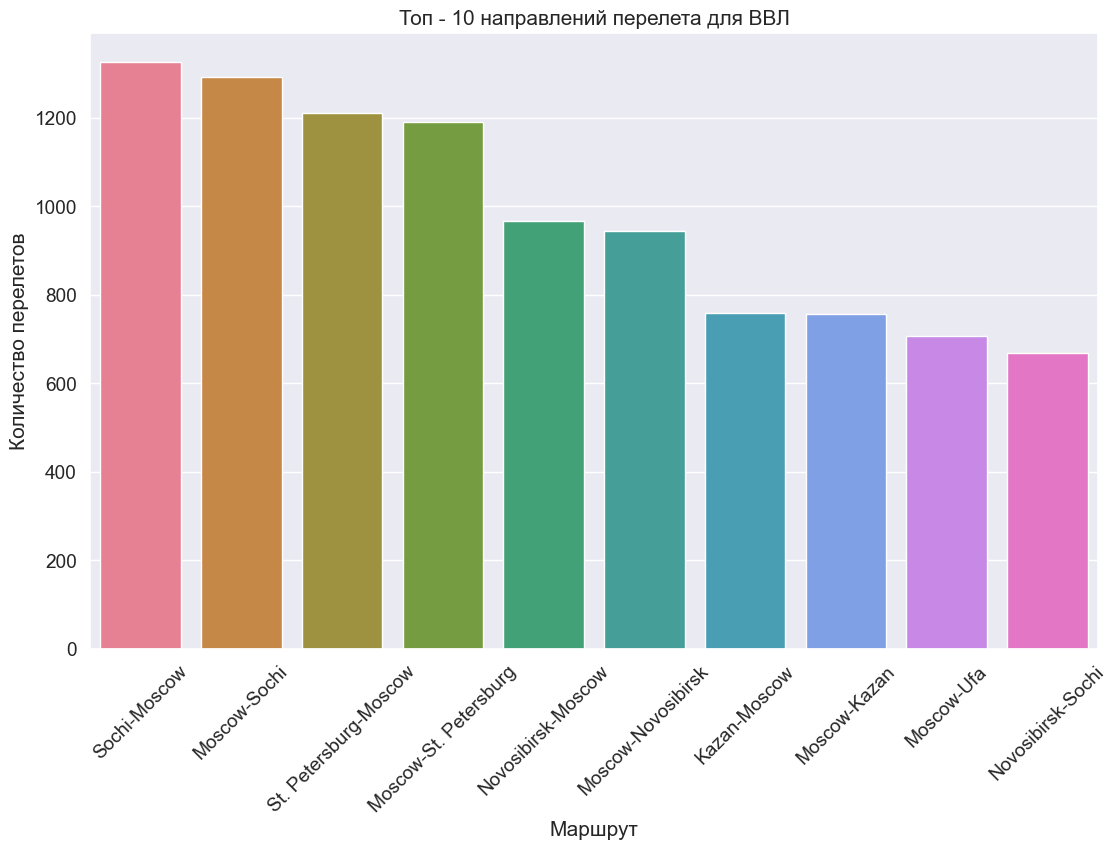

In [84]:
sns.barplot(data=df1, y=df1['direction'], x=df1.index, palette='husl').set(title='Топ - 10 направлений перелета для ВВЛ', xlabel='Маршрут', ylabel='Количество перелетов')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Moscow-Osh'),
  Text(1, 0, 'Khudzhand-Moscow'),
  Text(2, 0, 'Osh-Moscow'),
  Text(3, 0, 'Moscow-Khudzhand'),
  Text(4, 0, 'Novosibirsk-Bishkek'),
  Text(5, 0, 'Novosibirsk-Osh'),
  Text(6, 0, 'Khudzhand-Novosibirsk'),
  Text(7, 0, 'Osh-Novosibirsk'),
  Text(8, 0, 'Bishkek-Novosibirsk'),
  Text(9, 0, 'Moscow-Antalya')])

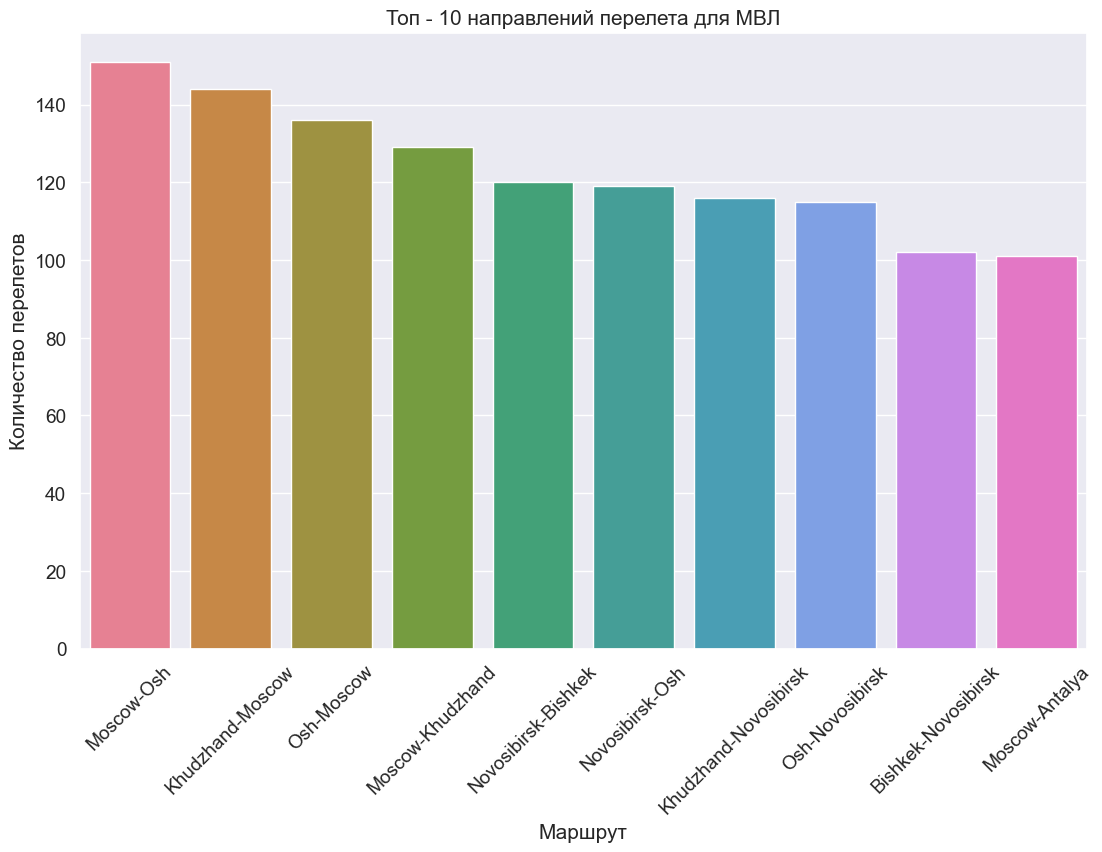

In [85]:
sns.barplot(data=df2, y=df2['direction'], x=df2.index, palette='husl').set(title='Топ - 10 направлений перелета для МВЛ', xlabel='Маршрут', ylabel='Количество перелетов')
plt.xticks(rotation=45)

Интересно, что самые популярные авиамаршруты в основном проходят не только через Москву и Санкт-Петербург, но и через Новосибирск. Такая тенденция связана в первую очередь с появлением федеральной программы субсидирования перевозок. У пассажиров появилась возможность быстро добраться до нужной точки, минуя при этом столицу. Кроме того, одна из крупнейших авиакомпаний России — S7 Airlines, сократила количество маршрутов из Москвы, но увеличила их в Новосибирске. Это связано с государственным субсидированием и закрытием границ вследствие пандемии

Теперь изучим выручку для этих направлений

In [86]:
df_revenue_1 = lal.groupby('direction')['revenue_amount'].agg(sum).sort_values(ascending=False).head(10).to_frame()
df_revenue_1

,revenue_amount
direction,
Sochi-Moscow,513970
Moscow-Sochi,480480
Novosibirsk-Moscow,460720
Moscow-Novosibirsk,440440
Novosibirsk-Sochi,382470
Sochi-Novosibirsk,343360
Novosibirsk-St. Petersburg,281800
St. Petersburg-Moscow,280870
Moscow-St. Petersburg,273720


In [87]:
df_revenue_2 = ial.groupby('direction')['revenue_amount'].agg(sum).sort_values(ascending=False).head(10).to_frame()
df_revenue_2

,revenue_amount
direction,
Khudzhand-Moscow,95190
Osh-Moscow,80920
Moscow-Osh,68130
Khudzhand-Novosibirsk,57740
Moscow-Khudzhand,57710
Osh-Novosibirsk,56980
Bishkek-Novosibirsk,48300
Novosibirsk-Osh,47450
Novosibirsk-Bishkek,46980


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sochi-Moscow'),
  Text(1, 0, 'Moscow-Sochi'),
  Text(2, 0, 'Novosibirsk-Moscow'),
  Text(3, 0, 'Moscow-Novosibirsk'),
  Text(4, 0, 'Novosibirsk-Sochi'),
  Text(5, 0, 'Sochi-Novosibirsk'),
  Text(6, 0, 'Novosibirsk-St. Petersburg'),
  Text(7, 0, 'St. Petersburg-Moscow'),
  Text(8, 0, 'Moscow-St. Petersburg'),
  Text(9, 0, 'St. Petersburg-Novosibirsk')])

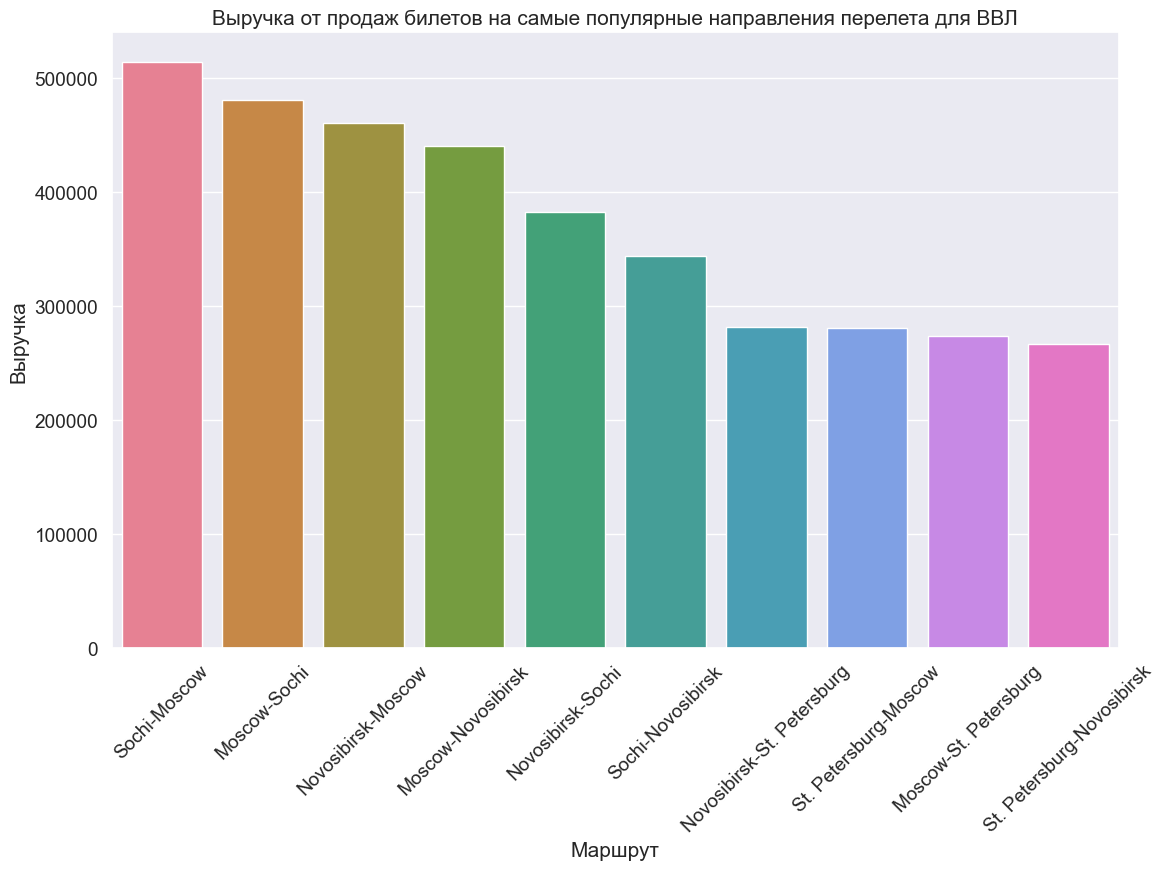

In [88]:
ax = sns.barplot(data=df_revenue_1, y=df_revenue_1['revenue_amount'], x=df_revenue_1.index, palette='husl').set(title='Выручка от продаж билетов на самые популярные направления перелета для ВВЛ', xlabel='Маршрут', ylabel='Выручка')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Khudzhand-Moscow'),
  Text(1, 0, 'Osh-Moscow'),
  Text(2, 0, 'Moscow-Osh'),
  Text(3, 0, 'Khudzhand-Novosibirsk'),
  Text(4, 0, 'Moscow-Khudzhand'),
  Text(5, 0, 'Osh-Novosibirsk'),
  Text(6, 0, 'Bishkek-Novosibirsk'),
  Text(7, 0, 'Novosibirsk-Osh'),
  Text(8, 0, 'Novosibirsk-Bishkek'),
  Text(9, 0, 'Moscow-Antalya')])

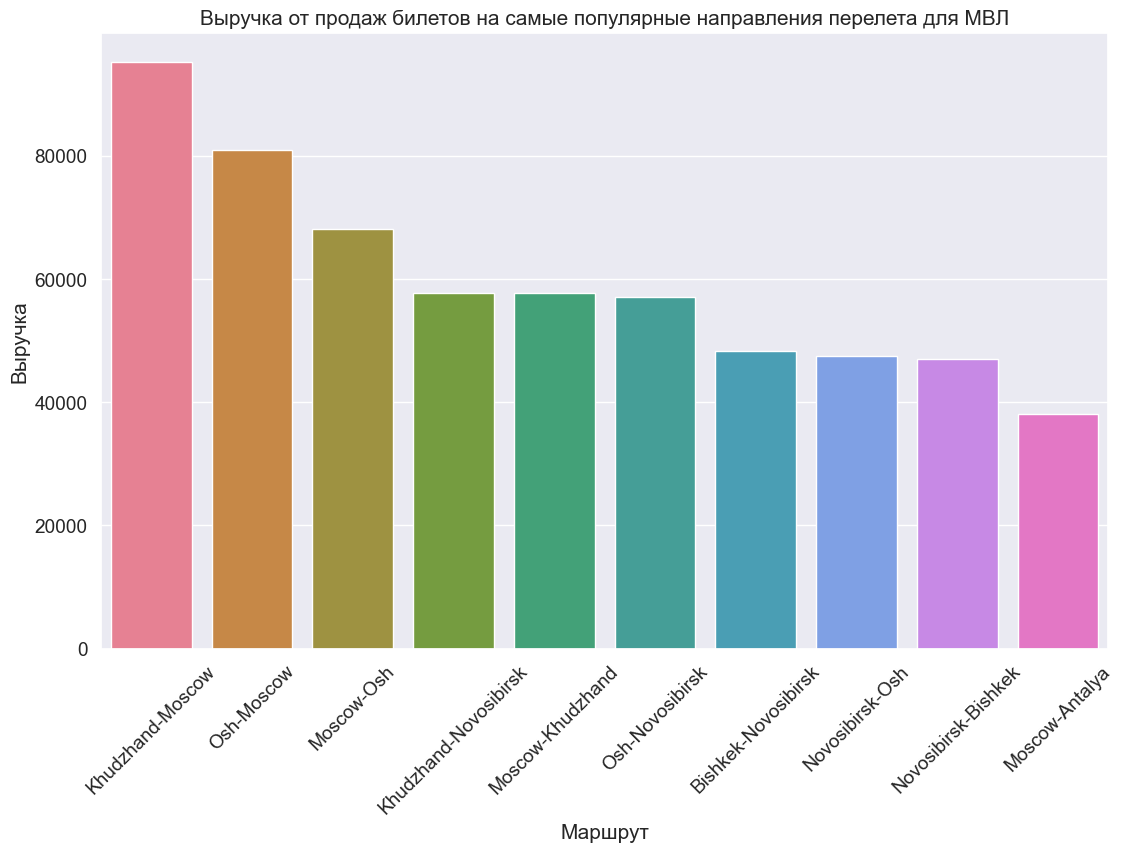

In [89]:
sns.barplot(data=df_revenue_2, y=df_revenue_2['revenue_amount'], x=df_revenue_2.index, palette='husl').set(title='Выручка от продаж билетов на самые популярные направления перелета для МВЛ', xlabel='Маршрут', ylabel='Выручка')
plt.xticks(rotation=45)

Можно заметить, что выручка от продажи билетов не всегда находится в прямой зависимости от популярности направления. Например, направление Санкт-Петербург - Москва стоит на 3-м месте по популярности, однако выручка от продаж билетов по данному маршруту располагается лишь на 8-м месте <br>
Вероятно такая ситуация связана с дальностью полета и как следствие различиями в цене

### <a class="anchor" id="14"></a> 3.6 Определим есть ли зависимость выручки от других признаков. Построим матрицу корреляций

Ввиду того, что наши данные содержат в основном категориальные переменные, мы воспользуемся кодировщиком для преобразований строковых значений в числовые, и только после этого приступим к построению матрицы корреляций

In [90]:
# импортируем из библиотеки scikit-learn кодировшик
from sklearn. preprocessing import OneHotEncoder

In [91]:
# закодируем наши значения
encoder = OneHotEncoder()

# кодируем значения
new_merged_df1 = pd.DataFrame(encoder.fit_transform(merged_df1[['pax_type', 'ffp_flag', 'sale_type']]).toarray()) 

# заполняем датасет новыми закодированными столбцами
super_new_merged_df1 = merged_df1.join(new_merged_df1)

# выведем полученный датафрейм
super_new_merged_df1

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,sale_difference,...,dest_airport_name,dest_city,direction,0,1,2,3,4,5,6
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NO,ONLINE,35.0,...,Khrabrovo Airport,Kaliningrad,Moscow-Kaliningrad,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NO,OFFLINE,3.0,...,Tolmachevo Airport,Novosibirsk,Yuzhno-sakhalinsk-Novosibirsk,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,37.0,...,NaN,Moscow,Kaliningrad-Moscow,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NO,ONLINE,28.0,...,NaN,Moscow,Voronezh-Moscow,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,35.0,...,Krasnodar Pashkovsky International Airport,Krasnodar,Moscow-Krasnodar,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48370,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,NO,ONLINE,11.0,...,Omsk Central Airport,Omsk,Moscow-Omsk,0.0,1.0,0.0,0.0,1.0,0.0,1.0
48371,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,NO,OFFLINE,14.0,...,NaN,Moscow,St. Petersburg-Moscow,1.0,0.0,0.0,0.0,1.0,1.0,0.0
48372,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,3.0,...,Kazan International Airport,Kazan,Moscow-Kazan,1.0,0.0,0.0,1.0,0.0,0.0,1.0
48373,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,NO,OFFLINE,2.0,...,NaN,Moscow,Kazan-Moscow,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [92]:
super_new_merged_df1.rename(columns = {0:'pax_type_ad', 1:'pax_type_chd', 2:'pax_type_inf', 3:'ffp_flag_ffp', 4:'ffp_flag_no', 5:'sale_type_offline', 6:'sale_type_online'}, inplace = True)
super_new_merged_df1

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,sale_difference,...,dest_airport_name,dest_city,direction,pax_type_ad,pax_type_chd,pax_type_inf,ffp_flag_ffp,ffp_flag_no,sale_type_offline,sale_type_online
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NO,ONLINE,35.0,...,Khrabrovo Airport,Kaliningrad,Moscow-Kaliningrad,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NO,OFFLINE,3.0,...,Tolmachevo Airport,Novosibirsk,Yuzhno-sakhalinsk-Novosibirsk,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,37.0,...,NaN,Moscow,Kaliningrad-Moscow,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NO,ONLINE,28.0,...,NaN,Moscow,Voronezh-Moscow,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,35.0,...,Krasnodar Pashkovsky International Airport,Krasnodar,Moscow-Krasnodar,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48370,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,NO,ONLINE,11.0,...,Omsk Central Airport,Omsk,Moscow-Omsk,0.0,1.0,0.0,0.0,1.0,0.0,1.0
48371,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,NO,OFFLINE,14.0,...,NaN,Moscow,St. Petersburg-Moscow,1.0,0.0,0.0,0.0,1.0,1.0,0.0
48372,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,3.0,...,Kazan International Airport,Kazan,Moscow-Kazan,1.0,0.0,0.0,1.0,0.0,0.0,1.0
48373,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,NO,OFFLINE,2.0,...,NaN,Moscow,Kazan-Moscow,1.0,0.0,0.0,0.0,1.0,1.0,0.0


Отлично! Данные закодированы, приступим к построению матрицы корреляций

In [93]:
matrix_corr = super_new_merged_df1[['pax_type_ad', 'pax_type_chd', 'pax_type_inf', 'ffp_flag_ffp', 'ffp_flag_no', 'sale_type_offline', 'sale_type_online', 'revenue_amount']].corr()
matrix_corr

,pax_type_ad,pax_type_chd,pax_type_inf,ffp_flag_ffp,ffp_flag_no,sale_type_offline,sale_type_online,revenue_amount
pax_type_ad,1.000000,-0.986721,-0.150924,0.161172,-0.161172,0.053149,-0.053149,0.074081
pax_type_chd,-0.986721,1.000000,-0.011644,-0.157461,0.157461,-0.055169,0.055169,-0.062942
pax_type_inf,-0.150924,-0.011644,1.000000,-0.033886,0.033886,0.008564,-0.008564,-0.072988
ffp_flag_ffp,0.161172,-0.157461,-0.033886,1.000000,-1.000000,-0.321423,0.321423,-0.052252
ffp_flag_no,-0.161172,0.157461,0.033886,-1.000000,1.000000,0.321423,-0.321423,0.052252
sale_type_offline,0.053149,-0.055169,0.008564,-0.321423,0.321423,1.000000,-1.000000,0.166082
sale_type_online,-0.053149,0.055169,-0.008564,0.321423,-0.321423,-1.000000,1.000000,-0.166082
revenue_amount,0.074081,-0.062942,-0.072988,-0.052252,0.052252,0.166082,-0.166082,1.000000


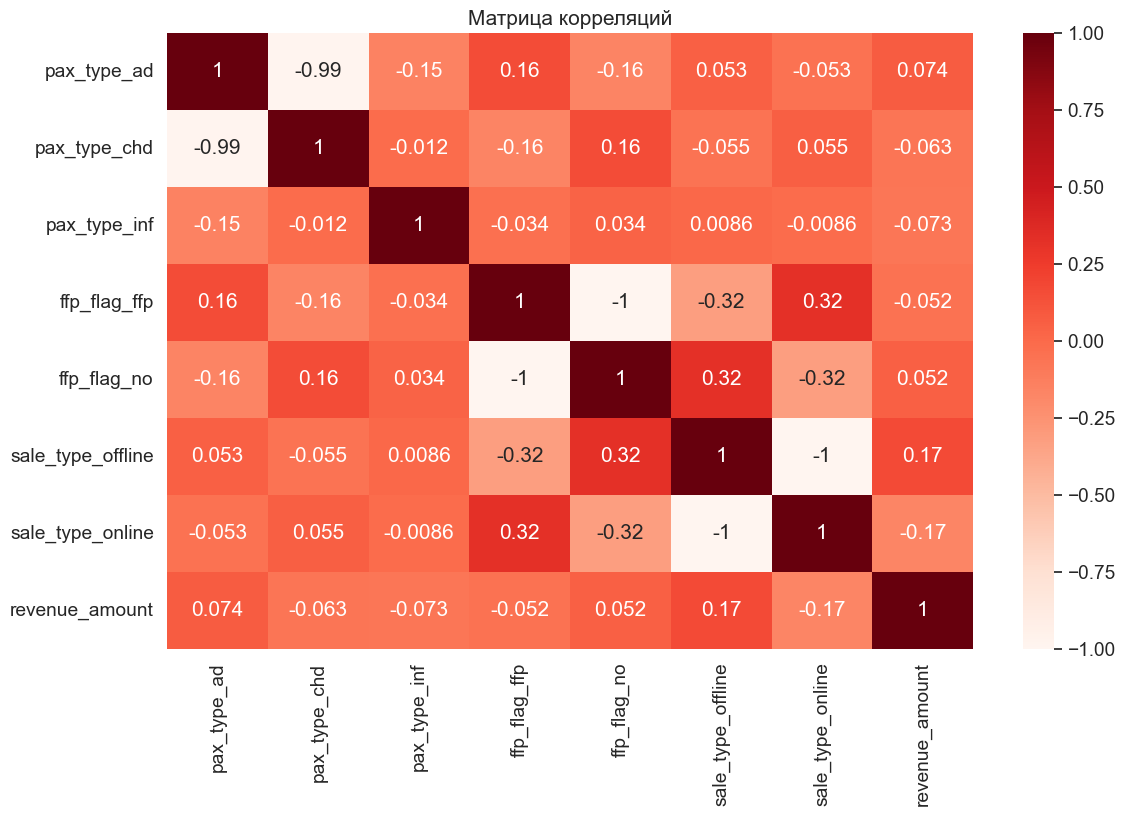

In [94]:
sns.heatmap(matrix_corr, annot=True, cmap='Reds')
plt.title('Матрица корреляций')
plt.show()

Итак, мы видим, что взаимосвязь выручки с другими факторами крайне мала. Самая сильная связь наблюдается между выручкой и офлайн покупкой билетов